# IDTA Coursework-1 
# Submitted By- UP2280648
# Date of Submission- 20th Nov, 2024

# Task 1 (Descriptive Analytics)

### Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the csv file

In [2]:
census=pd.read_csv("Census.csv")

### Top 5 rows of the Census Data

In [3]:
pd.set_option('display.max_colwidth', None)
census.head()

Person ID     Region Residence Type  Family Composition  Population Base  \
0    7394816  E12000001              H                   2                1   
1    7394832  E12000001              H                   3                1   
2    7394719  E12000001              H                   2                1   
3    7394840  E12000001              H                   1                1   
4    7394711  E12000001              H                   2                1   

   Sex  Age  Marital Status  Student  Country of Birth  Health  Ethnic Group  \
0    2    6               2        2                 1       2             1   
1    2    1               1        2                 1       2             1   
2    1    7               2        2                 1       1             1   
3    2    6               4        2                 1       3             1   
4    1    1               1        1                 1       1             1   

   Religion  Economic Activity  Occupation  Industry  Hours worked per week  \
0         2                  5           8         2                     -9   
1         1                 -9          -9        -9                     -9   
2         2                  5           8         2                     -9   
3         2                  5           9         5                     -9   
4         1                 -9          -9        -9                     -9   

   No of hours  Approximated Social Grade  
0          NaN                          4  
1          NaN                         -9  
2          NaN                          2  
3          NaN                          4  
4          NaN                         -9

In [4]:
# checking the size of the dataset
census.shape

(569740, 19)

### Name of the columns in the Dataset

In [5]:
census.keys()

Index(['Person ID', 'Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'No of hours', 'Approximated Social Grade'],
      dtype='object')

### Default Datatypes of the Columns

In [6]:
census.dtypes

Person ID                      int64
Region                        object
Residence Type                object
Family Composition             int64
Population Base                int64
Sex                            int64
Age                            int64
Marital Status                 int64
Student                        int64
Country of Birth               int64
Health                         int64
Ethnic Group                   int64
Religion                       int64
Economic Activity              int64
Occupation                     int64
Industry                       int64
Hours worked per week          int64
No of hours                  float64
Approximated Social Grade      int64
dtype: object

### Mapping the correct names of the values in the dataset for easy interpretation and understanding

In [7]:
# Replacing values for the Region column
census['Region'] = census['Region'].replace({
    'E12000001': 'North East',
    'E12000002': 'North West',
    'E12000003': 'Yorkshire and the Humber',
    'E12000004': 'East Midlands',
    'E12000005': 'West Midlands',
    'E12000006': 'East of England',
    'E12000007': 'London',
    'E12000008': 'South East',
    'E12000009': 'South West',
    'W92000004': 'Wales'
})

# Replacing values for the Residence type column
census['Residence Type'] = census['Residence Type'].replace({
    'C': 'Resident in a communal establishment',
    'H': 'Not resident in a communal establishment'
})

# Replacing values for the Family Composition column
census['Family Composition'] = census['Family Composition'].replace({
    1: 'Not in a family',
    2: 'Married/same-sex civil partnership couple family',
    3: 'Cohabiting couple family',
    4: 'Lone parent family (male head)',
    5: 'Lone parent family (female head)',
    6: 'Other related family',
    -9: 'No code required (Resident of a communal establishment, students or schoolchildren living away during term-time, or a short-term resident)'
})

# Replacing values for the Population base column
census['Population Base'] = census['Population Base'].replace({
    1: 'Usual resident',
    2: 'Student living away from home during term-time',
    3: 'Short-term resident'
})

# Replacing values for the Sex column
census['Sex'] = census['Sex'].replace({
    1: 'Male',
    2: 'Female'
})

# Replacing values for the Age column
census['Age'] = census['Age'].replace({
    1: '0 to 15',
    2: '16 to 24',
    3: '25 to 34',
    4: '35 to 44',
    5: '45 to 54',
    6: '55 to 64',
    7: '65 to 74',
    8: '75 and over'
})

# Replacing values for the Marital status column
census['Marital Status'] = census['Marital Status'].replace({
    1: 'Single (never married or never registered a same-sex civil partnership)',
    2: 'Married or in a registered same-sex civil partnership',
    3: 'Separated but still legally married or in a same-sex civil partnership',
    4: 'Divorced or formerly in a same-sex civil partnership which is now legally dissolved',
    5: 'Widowed or surviving partner from a same-sex civil partnership'
})

# Replacing values for the Student column
census['Student'] = census['Student'].replace({
    1: 'Yes',
    2: 'No'
})

# Replacing values for the Country of birth column
census['Country of Birth'] = census['Country of Birth'].replace({
    1: 'UK',
    2: 'Non UK',
    -9: 'No code required (Students or schoolchildren living away during term-time)'
})

# Replacing values for the Health column
census['Health'] = census['Health'].replace({
    1: 'Very good health',
    2: 'Good health',
    3: 'Fair health',
    4: 'Bad health',
    5: 'Very bad health',
    -9: 'No code required'
})

# Replacing values for the Ethnic Group column
census['Ethnic Group'] = census['Ethnic Group'].replace({
    1: 'White',
    2: 'Mixed',
    3: 'Asian and Asian British',
    4: 'Black or Black British',
    5: 'Chinese or Other ethnic group',
    -9: 'No code required (Not resident in England or Wales, students or schoolchildren living away during term-time)'
})

# Replacing values for the Religion column
census['Religion'] = census['Religion'].replace({
    1: 'No religion',
    2: 'Christian',
    3: 'Buddhist',
    4: 'Hindu',
    5: 'Jewish',
    6: 'Muslim',
    7: 'Sikh',
    8: 'Other religion',
    9: 'Not stated',
    -9: 'No code required (Not resident in England or Wales, students or schoolchildren living away during term-time)'
})

# Replacing values for the Economic Activity column
census['Economic Activity'] = census['Economic Activity'].replace({
    1: 'Economically active: Employee',
    2: 'Economically active: Self-employed',
    3: 'Economically active: Unemployed',
    4: 'Economically active: Full-time student',
    5: 'Economically inactive: Retired',
    6: 'Economically inactive: Student',
    7: 'Economically inactive: Looking after home or family',
    8: 'Economically inactive: Long-term sick or disabled',
    9: 'Economically inactive: Other',
    -9: 'No code required (Aged under 16 or students or schoolchildren living away during term-time)'
})

# Replacing values for the Occupation column
census['Occupation'] = census['Occupation'].replace({
    1: 'Managers, Directors and Senior Officials',
    2: 'Professional Occupations',
    3: 'Associate Professional and Technical Occupations',
    4: 'Administrative and Secretarial Occupations',
    5: 'Skilled Trades Occupations',
    6: 'Caring, Leisure and Other Service Occupations',
    7: 'Sales and Customer Service Occupations',
    8: 'Process, Plant and Machine Operatives',
    9: 'Elementary Occupations',
    -9: 'No code required'
})

# Replacing values for the Industry column
census['Industry'] = census['Industry'].replace({
    1: 'Agriculture, forestry and fishing',
    2: 'Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply',
    3: 'Construction',
    4: 'Wholesale and retail trade; Repair of motor vehicles and motorcycles',
    5: 'Accommodation and food service activities',
    6: 'Transport and storage; Information and communication',
    7: 'Financial and insurance activities; Intermediation',
    8: 'Real estate activities; Professional, scientific and technical activities; Administrative and support service activities',
    9: 'Public administration and defence; compulsory social security',
    10: 'Education',
    11: 'Human health and social work activities',
    12: 'Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies',
    -9: 'No code required (People aged under 16, people who have never worked, and students or schoolchildren living away during term-time)'
})

# Replacing values for the Hours worked per week column
census['Hours worked per week'] = census['Hours worked per week'].replace({
    1: 'Part-time: 15 or less hours worked',
    2: 'Part-time: 16 to 30 hours worked',
    3: 'Full-time: 31 to 48 hours worked',
    4: 'Full-time: 49 or more hours worked',
    -9: 'No code required (People aged under 16, people not working, and students or schoolchildren living away during term-time)'
})

# Replacing values for the Approximated Social Grade column
census['Approximated Social Grade'] = census['Approximated Social Grade'].replace({
    1: 'AB',
    2: 'C1',
    3: 'C2',
    4: 'DE',
    -9: 'No code required (People aged under 16, people resident in communal establishments, and students or schoolchildren living away during term-time)'
})

census.head()

Person ID      Region                            Residence Type  \
0    7394816  North East  Not resident in a communal establishment   
1    7394832  North East  Not resident in a communal establishment   
2    7394719  North East  Not resident in a communal establishment   
3    7394840  North East  Not resident in a communal establishment   
4    7394711  North East  Not resident in a communal establishment   

                                 Family Composition Population Base     Sex  \
0  Married/same-sex civil partnership couple family  Usual resident  Female   
1                          Cohabiting couple family  Usual resident  Female   
2  Married/same-sex civil partnership couple family  Usual resident    Male   
3                                   Not in a family  Usual resident  Female   
4  Married/same-sex civil partnership couple family  Usual resident    Male   

        Age  \
0  55 to 64   
1   0 to 15   
2  65 to 74   
3  55 to 64   
4   0 to 15   

                                                                        Marital Status  \
0                                Married or in a registered same-sex civil partnership   
1              Single (never married or never registered a same-sex civil partnership)   
2                                Married or in a registered same-sex civil partnership   
3  Divorced or formerly in a same-sex civil partnership which is now legally dissolved   
4              Single (never married or never registered a same-sex civil partnership)   

  Student Country of Birth            Health Ethnic Group     Religion  \
0      No               UK       Good health        White    Christian   
1      No               UK       Good health        White  No religion   
2      No               UK  Very good health        White    Christian   
3      No               UK       Fair health        White    Christian   
4     Yes               UK  Very good health        White  No religion   

                                                                             Economic Activity  \
0                                                               Economically inactive: Retired   
1  No code required (Aged under 16 or students or schoolchildren living away during term-time)   
2                                                               Economically inactive: Retired   
3                                                               Economically inactive: Retired   
4  No code required (Aged under 16 or students or schoolchildren living away during term-time)   

                              Occupation  \
0  Process, Plant and Machine Operatives   
1                       No code required   
2  Process, Plant and Machine Operatives   
3                 Elementary Occupations   
4                       No code required   

                                                                                                                             Industry  \
0                              Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply   
1  No code required (People aged under 16, people who have never worked, and students or schoolchildren living away during term-time)   
2                              Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply   
3                                                                                           Accommodation and food service activities   
4  No code required (People aged under 16, people who have never worked, and students or schoolchildren living away during term-time)   

                                                                                                      Hours worked per week  \
0  No code required (People aged under 16, people not working, and students or schoolchildren living away during term-time)   
1  No code required (People aged under 16, people not working, and students or schoolchildren livin

### Converting Datatypes of Columns for correct and logical analysis

In [8]:
# List of columns to convert to object data type (excluding Region, Residence Type, and No of hours)
columns_to_convert = ['Family Composition', 'Population Base', 'Sex', 
                      'Age', 'Marital Status', 'Student', 
                      'Country of Birth', 'Health', 
                      'Ethnic Group', 'Religion', 
                      'Economic Activity', 'Occupation', 
                      'Industry', 'Hours worked per week', 
                      'Approximated Social Grade']

# Converting the above specified columns to object data type in the 'census' DataFrame
census[columns_to_convert] = census[columns_to_convert].astype('object')
census.dtypes

Person ID                      int64
Region                        object
Residence Type                object
Family Composition            object
Population Base               object
Sex                           object
Age                           object
Marital Status                object
Student                       object
Country of Birth              object
Health                        object
Ethnic Group                  object
Religion                      object
Economic Activity             object
Occupation                    object
Industry                      object
Hours worked per week         object
No of hours                  float64
Approximated Social Grade     object
dtype: object

## 1. Basic Statistics of all Attributes

#### 1.1 Basic Statistics for 'Region' attribute

In [9]:
census['Region'].describe()

count         569740
unique            10
top       South East
freq           88084
Name: Region, dtype: object

#### 1.2 Basic Statistics for 'Residence Type' attribute

In [10]:
census['Residence Type'].describe()

count                                       569740
unique                                           2
top       Not resident in a communal establishment
freq                                        559086
Name: Residence Type, dtype: object

#### 1.3 Basic Statistics for 'Family Composition' attribute

In [11]:
census['Family Composition'].describe()

count                                               569740
unique                                                   7
top       Married/same-sex civil partnership couple family
freq                                                300961
Name: Family Composition, dtype: object

#### 1.4 Basic Statistics for 'Population Base' attribute

In [12]:
census['Population Base'].describe()

count             569740
unique                 3
top       Usual resident
freq              561039
Name: Population Base, dtype: object

#### 1.5 Basic Statistics for 'Sex' attribute

In [13]:
census['Sex'].describe()

count     569740
unique         2
top       Female
freq      289172
Name: Sex, dtype: object

#### 1.6 Basic Statistics for 'Age' attribute

In [14]:
census['Age'].describe()

count      569740
unique          8
top       0 to 15
freq       106832
Name: Age, dtype: object

#### 1.7 Basic Statistics for 'Marital Status' attribute

In [15]:
census['Marital Status'].describe()

count                                                                      569740
unique                                                                          5
top       Single (never married or never registered a same-sex civil partnership)
freq                                                                       270999
Name: Marital Status, dtype: object

#### 1.8 Basic Statistics for 'Student' attribute

In [16]:
census['Student'].describe()

count     569740
unique         2
top           No
freq      443203
Name: Student, dtype: object

#### 1.9 Basic statistics for 'Country of Birth' attribute

In [17]:
census['Country of Birth'].describe()

count     569740
unique         3
top           UK
freq      485645
Name: Country of Birth, dtype: object

#### 1.10 Basic statistics for 'Health' attribute

In [18]:
census['Health'].describe()

count               569740
unique                   6
top       Very good health
freq                264971
Name: Health, dtype: object

#### 1.11 Basic statistics for 'Ethnic Group' attribute

In [19]:
census['Ethnic Group'].describe()

count     569740
unique         6
top        White
freq      483477
Name: Ethnic Group, dtype: object

#### 1.12 Basic statistics for 'Religion' attribute

In [20]:
census['Religion'].describe()

count        569740
unique           10
top       Christian
freq         333481
Name: Religion, dtype: object

#### 1.13 Basic statistics for 'Economic Activity' attribute

In [21]:
census['Economic Activity'].describe()

count                            569740
unique                               10
top       Economically active: Employee
freq                             216024
Name: Economic Activity, dtype: object

#### 1.14 Basic statistics for 'Occupation' attribute

In [22]:
census['Occupation'].describe()


count               569740
unique                  10
top       No code required
freq                149984
Name: Occupation, dtype: object

#### 1.15 Basic statistics for 'Industry' attribute

In [23]:
census['Industry'].describe()

count                                                                                                                                 569740
unique                                                                                                                                    13
top       No code required (People aged under 16, people who have never worked, and students or schoolchildren living away during term-time)
freq                                                                                                                                  149984
Name: Industry, dtype: object

#### 1.16 Basic statistics for 'Hours worked per week' attribute

In [24]:
census['Hours worked per week'].describe()

count                                                                                                                       569740
unique                                                                                                                           5
top       No code required (People aged under 16, people not working, and students or schoolchildren living away during term-time)
freq                                                                                                                        302321
Name: Hours worked per week, dtype: object

#### 1.17 Basic statistics for 'No of hours' attribute (numeric column)

In [25]:
census['No of hours'].describe()

count    267419.000000
mean         35.234789
std          13.520881
min           1.000000
25%          27.000000
50%          37.000000
75%          45.000000
max          60.000000
Name: No of hours, dtype: float64

#### 1.18  Basic Statistics for 'Approximated Social Grade'

In [26]:
census['Approximated Social Grade'].describe()

count     569740
unique         5
top           C1
freq      159642
Name: Approximated Social Grade, dtype: object

### Alternate and fast way to retrieve the basic statistics for all categorical attrbutes attributes

In [27]:
census.describe(include='object')

Region                            Residence Type  \
count       569740                                    569740   
unique          10                                         2   
top     South East  Not resident in a communal establishment   
freq         88084                                    559086   

                                      Family Composition Population Base  \
count                                             569740          569740   
unique                                                 7               3   
top     Married/same-sex civil partnership couple family  Usual resident   
freq                                              300961          561039   

           Sex      Age  \
count   569740   569740   
unique       2        8   
top     Female  0 to 15   
freq    289172   106832   

                                                                 Marital Status  \
count                                                                    569740   
unique                                                                        5   
top     Single (never married or never registered a same-sex civil partnership)   
freq                                                                     270999   

       Student Country of Birth            Health Ethnic Group   Religion  \
count   569740           569740            569740       569740     569740   
unique       2                3                 6            6         10   
top         No               UK  Very good health        White  Christian   
freq    443203           485645            264971       483477     333481   

                    Economic Activity        Occupation  \
count                          569740            569740   
unique                             10                10   
top     Economically active: Employee  No code required   
freq                           216024            149984   

                                                                                                                                  Industry  \
count                                                                                                                               569740   
unique                                                                                                                                  13   
top     No code required (People aged under 16, people who have never worked, and students or schoolchildren living away during term-time)   
freq                                                                                                                                149984   

                                                                                                           Hours worked per week  \
count                                                                                                                     569740   
unique                                                                                                                         5   
top     No code required (People aged under 16, people not working, and students or schoolchildren living away during term-time)   
freq                                                                                                                      302321   

       Approximated Social Grade  
count                     569740  
unique                         5  
top                           C1  
freq                      159642

### Alternate and fast way to retrieve the basic statistics for all numerical attrbutes 

In [28]:
census.describe()

Person ID    No of hours
count  5.697400e+05  267419.000000
mean   7.679353e+06      35.234789
std    1.644699e+05      13.520881
min    7.394483e+06       1.000000
25%    7.536918e+06      27.000000
50%    7.679352e+06      37.000000
75%    7.821787e+06      45.000000
max    7.964223e+06      60.000000

## 2. Visualisations to Analyse Relationships Between Two or More Important Attributes

### 2.1 Distribution of 'Sex' by 'Region'

#### 2.1.1 Using 'Contingency Table' to show the distribution of 'Sex' by 'Region'

In [29]:
crosstab=pd.crosstab(census['Region'],census['Sex'])
crosstab

Sex                       Female   Male
Region                                 
East Midlands              23095  22687
East of England            30060  29351
London                     42382  41200
North East                 13404  12945
North West                 36215  35221
South East                 44582  43502
South West                 27541  26233
Wales                      15670  15306
West Midlands              28895  27980
Yorkshire and the Humber   27328  26143

#### 2.1.2 Using 'Grouped Bar Chart' to show the distribution of 'Sex' by 'Region'

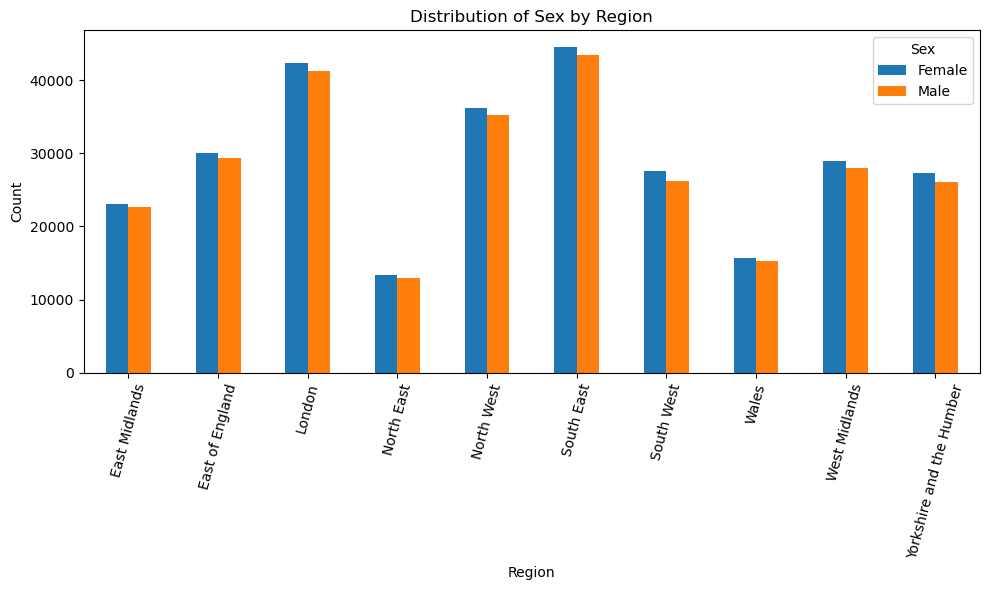

In [30]:
crosstab=pd.crosstab(census['Region'],census['Sex'])
# Plotting a grouped bar chart
crosstab.plot(kind='bar', figsize=(10, 6))

plt.title('Distribution of Sex by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.xticks(rotation=75)
plt.legend(title='Sex')


plt.tight_layout()  
plt.show()


### 2.2 Distribution of 'Student' across different 'Region'

#### 2.2.1 Using 'Contingency Table' to show distribution of 'Student' across different 'Region'

In [31]:
crosstab=pd.crosstab(census['Region'],census['Student'])
crosstab

Student                      No    Yes
Region                                
East Midlands             35817   9965
East of England           47048  12363
London                    62748  20834
North East                20628   5721
North West                55781  15655
South East                68644  19440
South West                42773  11001
Wales                     24053   6923
West Midlands             44036  12839
Yorkshire and the Humber  41675  11796

#### 2.2.2 Using 'Stacked Bar Chart' to show distribution of 'Student' across different 'Region'

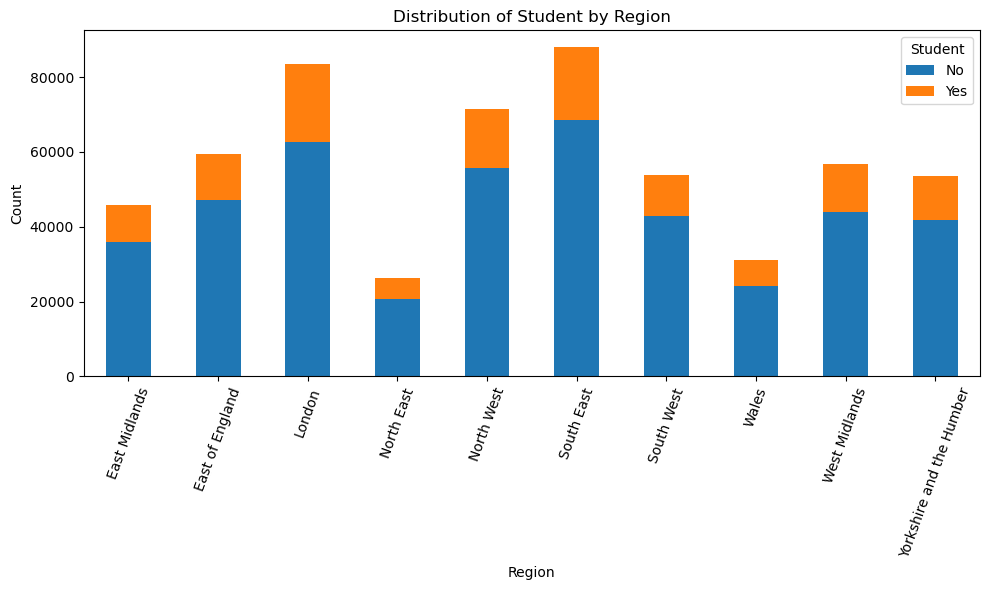

In [32]:
crosstab=pd.crosstab(census['Region'],census['Student'])
# Plotting a stacked bar chart
crosstab.plot(kind='bar',stacked=True,figsize=(10, 6))


plt.title('Distribution of Student by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.xticks(rotation=70)
plt.legend(title='Student')


plt.tight_layout()  
plt.show()

### 2.3 'Health' conditions among the two 'Sex'

#### 2.3.1 Using 'Contingency Table' to analyse the condition of 'Health' among the two 'Sex'

In [33]:
crosstab=pd.crosstab(census['Sex'],census['Health'])
crosstab

Health  Bad health  Fair health  Good health  No code required  \
Sex                                                              
Female       13191        40121        98383              3371   
Male         11367        34359        93360              3433   

Health  Very bad health  Very good health  
Sex                                        
Female             3795            130311  
Male               3389            134660

#### 2.3.2 Using 'Grouped Bar Chart' to analyse the condition of 'Health' among the two 'Sex'

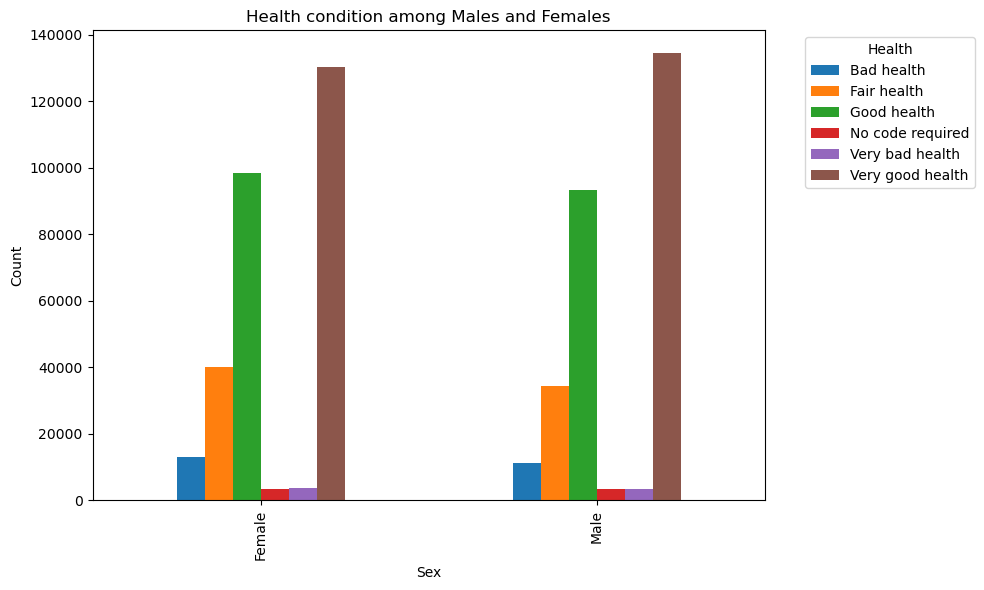

In [34]:
# Plotting a grouped bar chart
crosstab.plot(kind='bar', figsize=(10, 6))


plt.title('Health condition among Males and Females')
plt.ylabel('Count')
plt.xlabel('Sex')
plt.legend(title='Health', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()  
plt.show()

### 2.4 Distribution of 'No of hours' based on 'Occupation'

#### 2.4.1 Using 'Boxplot' to show distribution of 'No of hours' based on 'Occupation'

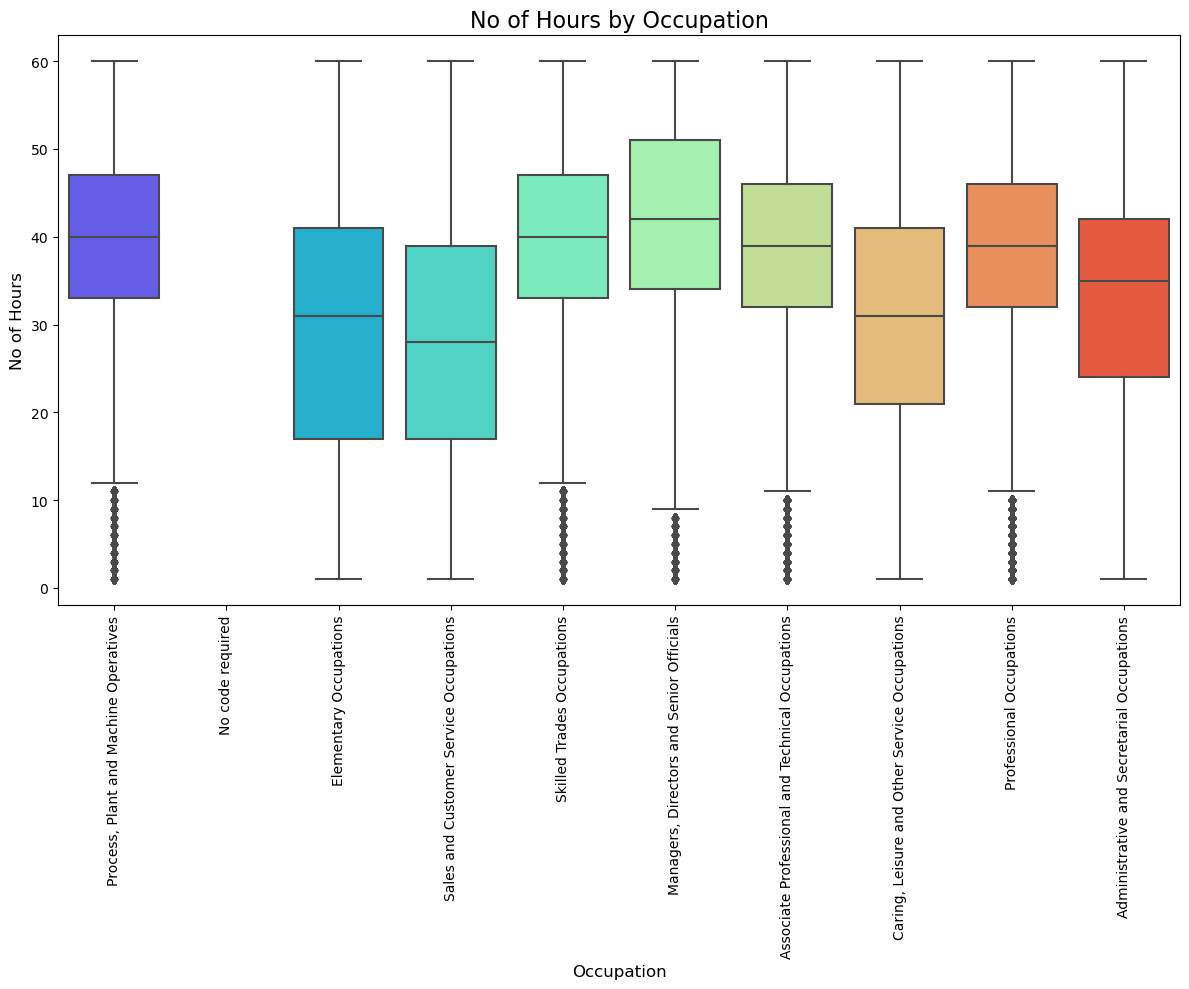

In [35]:
plt.figure(figsize=(12, 10)) # setting the size of the plot

# Plotting the boxplot
sns.boxplot(x='Occupation', y='No of hours', data=census, palette='rainbow')


plt.title('No of Hours by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('No of Hours', fontsize=12)
plt.xticks(rotation=90)



plt.tight_layout()
plt.show()

#### 2.4.2 Using 'Violinplot' to show distribution of 'No of hours' based on 'Occupation'

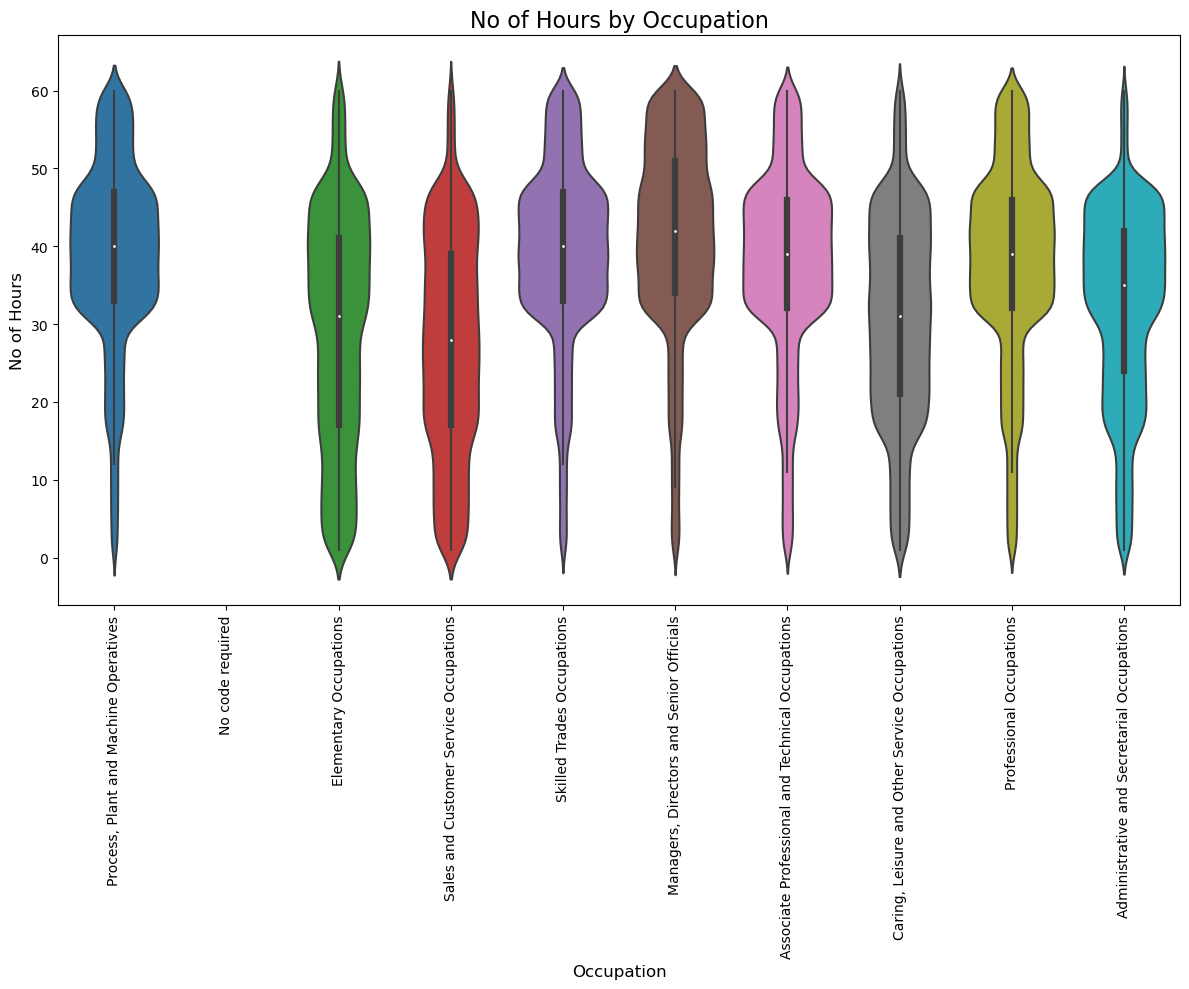

In [36]:
plt.figure(figsize=(12, 10)) # setting the size of the figure

# Plotting the violinplot
sns.violinplot(x='Occupation', y='No of hours', data=census)


plt.title('No of Hours by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('No of Hours', fontsize=12)


plt.xticks(rotation=90)


plt.tight_layout()


plt.show()

### 2.5 Analysis of 'Marital Status' between the two 'Sex'

#### 2.5.1 Using 'Contingency Table' to analyse 'Marital Status' between the two 'Sex'

In [37]:
crosstab=pd.crosstab(census['Marital Status'],census['Sex'])
crosstab

Sex                                                                                  Female  \
Marital Status                                                                                
Divorced or formerly in a same-sex civil partnership which is now legally dissolved   23318   
Married or in a registered same-sex civil partnership                                106665   
Separated but still legally married or in a same-sex civil partnership                 6864   
Single (never married or never registered a same-sex civil partnership)              127679   
Widowed or surviving partner from a same-sex civil partnership                        24646   

Sex                                                                                    Male  
Marital Status                                                                               
Divorced or formerly in a same-sex civil partnership which is now legally dissolved   17395  
Married or in a registered same-sex civil partnership                                107514  
Separated but still legally married or in a same-sex civil partnership                 5087  
Single (never married or never registered a same-sex civil partnership)              143320  
Widowed or surviving partner from a same-sex civil partnership                         7252

#### 2.5.2 Using 'Stacked Bar Chart' to analyse 'Marital Status' between the two 'Sex'

C:\Users\ASUS\AppData\Local\Temp\ipykernel_47204\1457516102.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


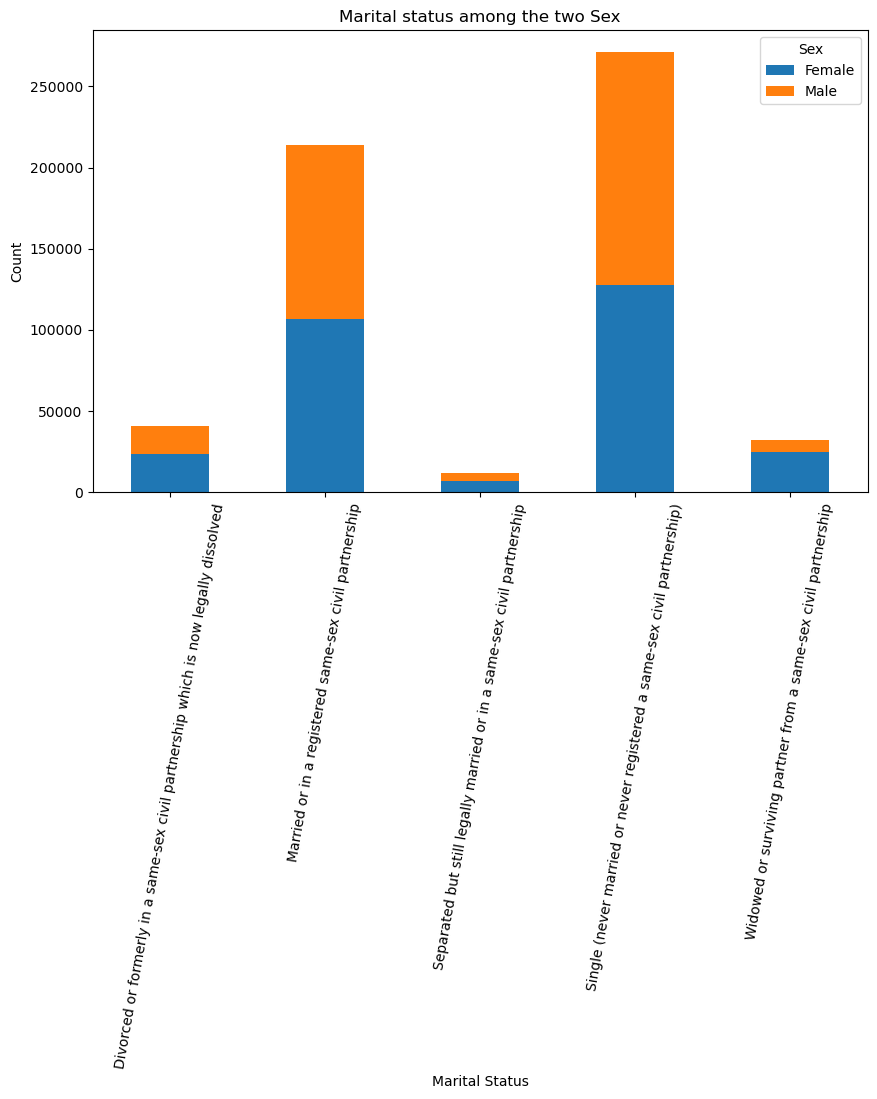

In [38]:
crosstab=pd.crosstab(census['Marital Status'],census['Sex'])
# Plotting a stacked bar chart
crosstab.plot(kind='bar',stacked=True, figsize=(10, 6))


plt.title('Marital status among the two Sex')
plt.ylabel('Count')
plt.xlabel('Marital Status')
plt.xticks(rotation=80)
plt.legend(title='Sex')


plt.tight_layout()  
plt.show()

### 2.6 Distribution of 'No of hours' based on 'Economic Activity'

#### 2.6.1 Plotting 'Violinplot' to show the distribution of 'No of hours' based on 'Economic Activity'

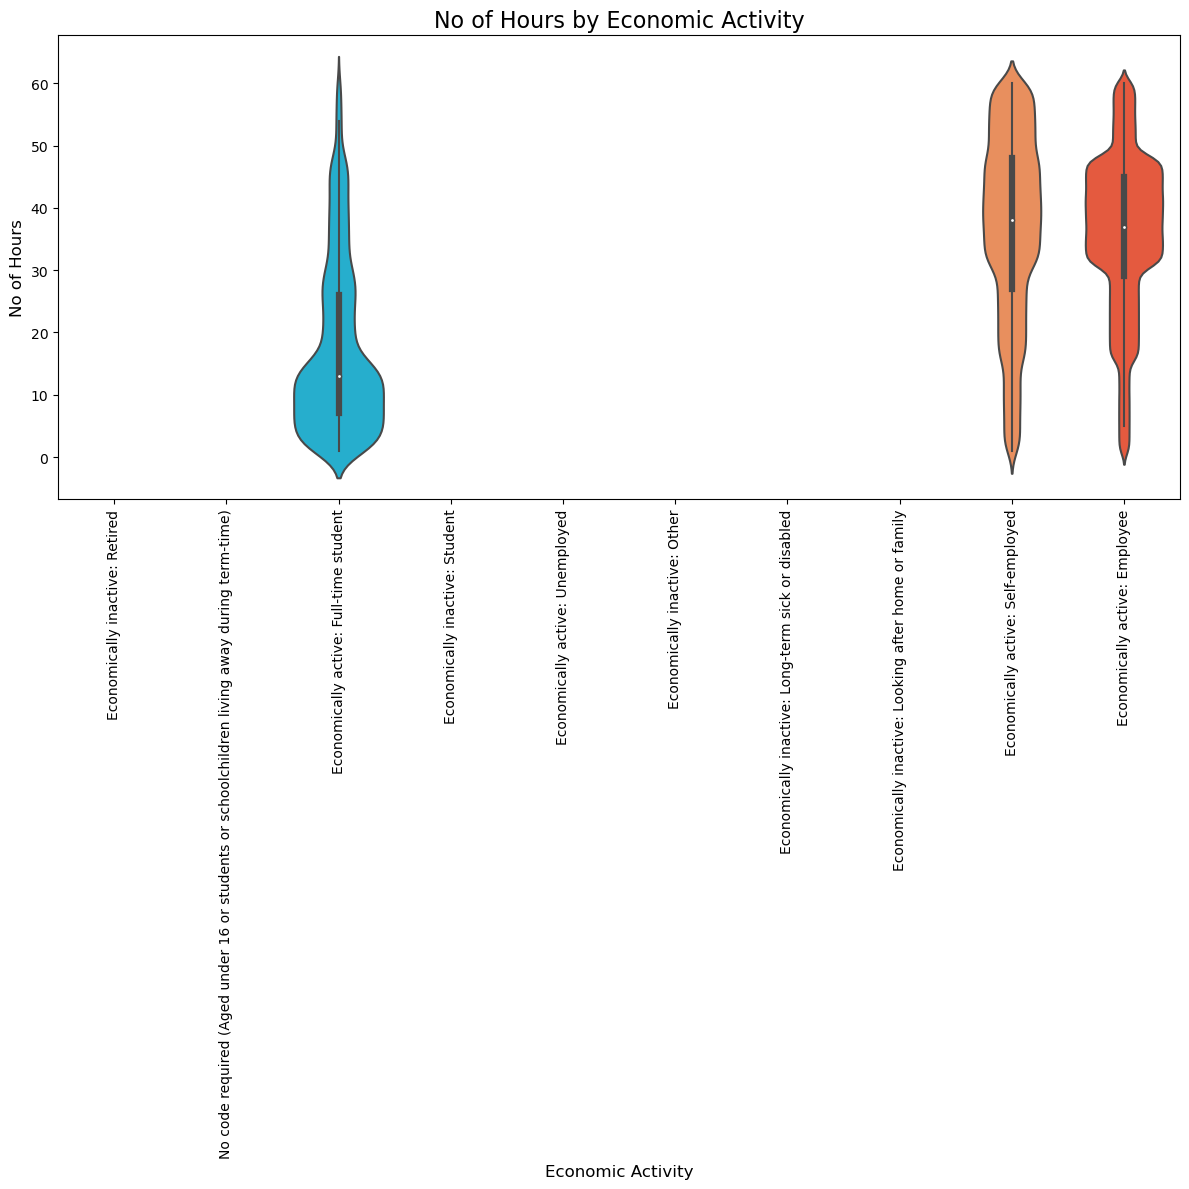

In [39]:
plt.figure(figsize=(12, 12))

# Plotting the violinplot
sns.violinplot(x='Economic Activity', y='No of hours', data=census, palette='rainbow')


plt.title('No of Hours by Economic Activity', fontsize=16)
plt.xlabel('Economic Activity', fontsize=12)
plt.ylabel('No of Hours', fontsize=12)
plt.xticks(rotation=90)



plt.tight_layout()


plt.show()

#### 2.6.2  Plotting 'Boxplot' to show the distribution of 'No of hours' based on 'Economic Activity'

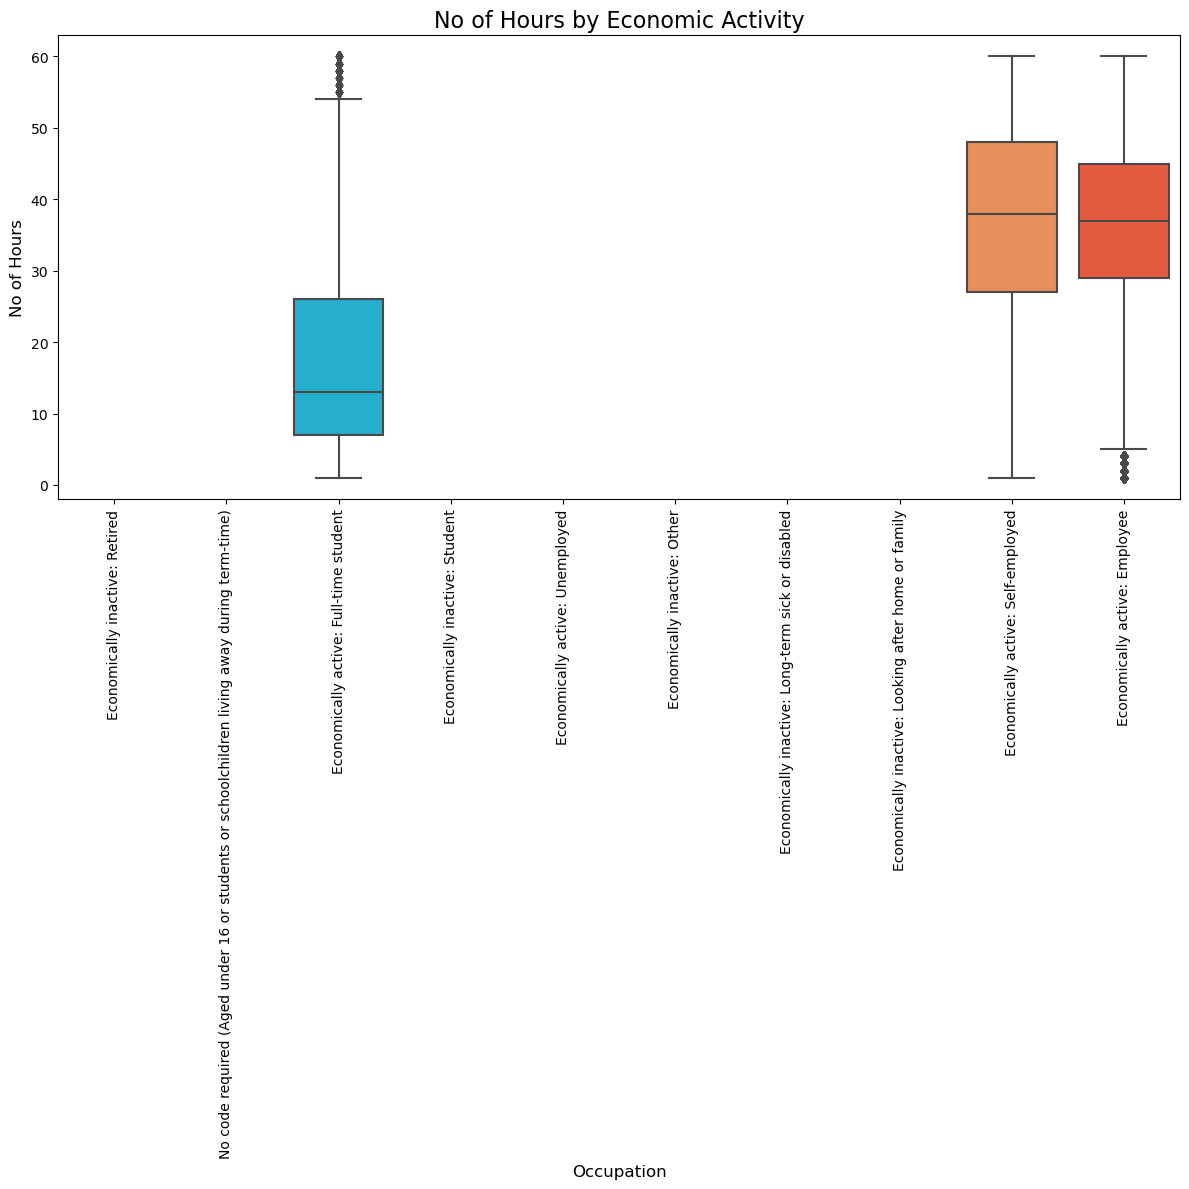

In [40]:
plt.figure(figsize=(12, 12))

# Plotting the box plot
sns.boxplot(x='Economic Activity', y='No of hours', data=census, palette='rainbow')


plt.title('No of Hours by Economic Activity', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('No of Hours', fontsize=12)
plt.xticks(rotation=90)


plt.tight_layout()

plt.show()

# Task 2 (Classification)

## 1. Preprocessing for Classification

### 1.1 Importing the Dataset

In [41]:
census_num=pd.read_csv("Census.csv")

In [42]:
census_num.head()

Person ID     Region Residence Type  Family Composition  Population Base  \
0    7394816  E12000001              H                   2                1   
1    7394832  E12000001              H                   3                1   
2    7394719  E12000001              H                   2                1   
3    7394840  E12000001              H                   1                1   
4    7394711  E12000001              H                   2                1   

   Sex  Age  Marital Status  Student  Country of Birth  Health  Ethnic Group  \
0    2    6               2        2                 1       2             1   
1    2    1               1        2                 1       2             1   
2    1    7               2        2                 1       1             1   
3    2    6               4        2                 1       3             1   
4    1    1               1        1                 1       1             1   

   Religion  Economic Activity  Occupation  Industry  Hours worked per week  \
0         2                  5           8         2                     -9   
1         1                 -9          -9        -9                     -9   
2         2                  5           8         2                     -9   
3         2                  5           9         5                     -9   
4         1                 -9          -9        -9                     -9   

   No of hours  Approximated Social Grade  
0          NaN                          4  
1          NaN                         -9  
2          NaN                          2  
3          NaN                          4  
4          NaN                         -9

### 1.2 Deleting the Person ID column

In [43]:
del census_num['Person ID']

### 1.3 Converting the datatypes of columns to numerical

In [44]:
# Datatypes of the columns by default
census_num.dtypes

Region                        object
Residence Type                object
Family Composition             int64
Population Base                int64
Sex                            int64
Age                            int64
Marital Status                 int64
Student                        int64
Country of Birth               int64
Health                         int64
Ethnic Group                   int64
Religion                       int64
Economic Activity              int64
Occupation                     int64
Industry                       int64
Hours worked per week          int64
No of hours                  float64
Approximated Social Grade      int64
dtype: object

In [45]:
# Using LabelEncoder to convert Region and Residence Type to numerical
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
census_num['Region']=LE.fit_transform(census_num['Region'])
census_num['Residence Type']=LE.fit_transform(census_num['Residence Type'])

In [46]:
# All columns are now in numeric form
census_num.dtypes

Region                         int32
Residence Type                 int32
Family Composition             int64
Population Base                int64
Sex                            int64
Age                            int64
Marital Status                 int64
Student                        int64
Country of Birth               int64
Health                         int64
Ethnic Group                   int64
Religion                       int64
Economic Activity              int64
Occupation                     int64
Industry                       int64
Hours worked per week          int64
No of hours                  float64
Approximated Social Grade      int64
dtype: object

### 1.4 Treating the outlier which is '-9'

In [47]:
# Replacing -9 with 0 in the entire dataset
census_num.replace(-9, 0, inplace=True)

### 1.5 Treating the missing values

In [48]:
census_num.isnull().sum()

Region                            0
Residence Type                    0
Family Composition                0
Population Base                   0
Sex                               0
Age                               0
Marital Status                    0
Student                           0
Country of Birth                  0
Health                            0
Ethnic Group                      0
Religion                          0
Economic Activity                 0
Occupation                        0
Industry                          0
Hours worked per week             0
No of hours                  302321
Approximated Social Grade         0
dtype: int64

In [49]:
non_working_economic_activity = [0, 3, 5, 6, 7, 8, 9]

# Imputing 'No of hours' with 0 for individuals with non-working Economic Activity codes
census_num.loc[census_num['Economic Activity'].isin(non_working_economic_activity), 'No of hours'] = 0


In [50]:
census_num.isnull().sum()

Region                          0
Residence Type                  0
Family Composition              0
Population Base                 0
Sex                             0
Age                             0
Marital Status                  0
Student                         0
Country of Birth                0
Health                          0
Ethnic Group                    0
Religion                        0
Economic Activity               0
Occupation                      0
Industry                        0
Hours worked per week           0
No of hours                  3354
Approximated Social Grade       0
dtype: int64

In [51]:
# Some missing values still remain which means that some missing values are present in working class too
# Calculating the median working hours for each occupation
median_hours_by_occupation = census_num.groupby('Occupation')['No of hours'].median()

# Imputing missing 'No of hours' based on median of occupation
census_num['No of hours'].fillna(census_num['Occupation'].map(median_hours_by_occupation), inplace=True)

In [52]:
# No missing values
census_num.isnull().sum()

Region                       0
Residence Type               0
Family Composition           0
Population Base              0
Sex                          0
Age                          0
Marital Status               0
Student                      0
Country of Birth             0
Health                       0
Ethnic Group                 0
Religion                     0
Economic Activity            0
Occupation                   0
Industry                     0
Hours worked per week        0
No of hours                  0
Approximated Social Grade    0
dtype: int64

### 1.6 Segregating Features and Target variable

In [53]:
# census_num is our original unscaled DataFrame
census_X = census_num.drop(columns=['Approximated Social Grade'])  # Features
y = census_num['Approximated Social Grade'].values # target variable

### 1.7 Normalising the features

In [54]:
from sklearn import preprocessing
# Applying MinMaxScaler only to X (features)
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(census_X)  # Scaled features

### 1.8 Partioning into train and test data

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

## 2. Classification

### 2.1 Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn import metrics
# Initializing the classifier 
RF = RandomForestClassifier(random_state=0, max_depth=20)

# Fitting the classifier to the training data
RF.fit(X_train, y_train)

# Predicting the values for the test data
y_pred = RF.predict(X_test)

# Performance metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), '\n')

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)), '\n')

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

# Calculating AUC score using one-vs-rest approach
y_proba = RF.predict_proba(X_test) 
print("AUC (One-vs-Rest):", roc_auc_score(y_test, y_proba, multi_class="ovr"))


Confusion Matrix:
 [[30732     0     0     0     0]
 [    0 15865  3796   259   979]
 [    0  3384 32860   829  2806]
 [    0   362   942 13766  4896]
 [    0   374  1344  2741 26500]] 

Mean Absolute Error: 0.2119493102116755
Mean Squared Error: 0.33593568996384315
Root Mean Squared Error: 0.5795995945166311 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30732
           1       0.79      0.76      0.78     20899
           2       0.84      0.82      0.83     39879
           3       0.78      0.69      0.73     19966
           4       0.75      0.86      0.80     30959

    accuracy                           0.84    142435
   macro avg       0.83      0.83      0.83    142435
weighted avg       0.84      0.84      0.84    142435

Accuracy: 0.8405448099132938
AUC (One-vs-Rest): 0.9738638884968814


### Accuracy Evaluation of Random Forest Classifier using 6-Fold Cross-Validation

In [59]:
# Importing necessary modules
from sklearn.model_selection import cross_val_score

# Performing 6-fold cross validation
scores = cross_val_score(RF, X, y, cv=6,n_jobs=-1)

# Printing the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Printing the average accuracy and standard deviation across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy scores for each fold: [0.73110987 0.68891182 0.66885011 0.76027044 0.79373605 0.65106997]
Accuracy: 0.72 (+/- 0.10)


### 2.2 Bagging Classifier

In [60]:
# Importing necessary libraries and models
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np

# Initializing the Bagging classifier (using decision trees)

BC = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20), n_estimators=30, random_state=0)  # Bagging with Decision Tree as base estimator

# Fitting the classifier to the data
BC.fit(X_train, y_train)

# Predicting the values for the test data
y_pred = BC.predict(X_test)

# Performance metrics
print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

#  Calculating AUC score using one-vs-rest approach
y_proba = BC.predict_proba(X_test)  
print("AUC (One-vs-Rest):", roc_auc_score(y_test, y_proba, multi_class="ovr"))

[[30724     0     4     2     2]
 [    0 15672  3982   367   878]
 [    0  3398 33018  1009  2454]
 [    0   397  1054 13858  4657]
 [    0   410  1617  3254 25678]] 

Mean Absolute Error: 0.21701126829782005
Mean Squared Error: 0.3394671253554253
Root Mean Squared Error: 0.5826380740695078 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30732
           1       0.79      0.75      0.77     20899
           2       0.83      0.83      0.83     39879
           3       0.75      0.69      0.72     19966
           4       0.76      0.83      0.79     30959

    accuracy                           0.84    142435
   macro avg       0.83      0.82      0.82    142435
weighted avg       0.84      0.84      0.83    142435

Accuracy: 0.8351177730192719
AUC (One-vs-Rest): 0.9723555005334588


### Accuracy Evaluation of Bagging Classifier using 6-Fold Cross-Validation

In [61]:
# Import necessary modules for cross-validation
from sklearn.model_selection import cross_val_score

# Performing 6-fold cross validation
scores = cross_val_score(BC, X, y, cv=6)  # Using accuracy as the scoring metric

# Printing the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Printing the average accuracy and standard deviation across all folds
print("Mean Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy scores for each fold: [0.71377571 0.66291058 0.67848605 0.80620702 0.73640423 0.6851805 ]
Mean Accuracy: 0.71 (+/- 0.10)


### 2.3 MLP Classifier

In [62]:
# importing the MLP classifier
from sklearn.neural_network import MLPClassifier

# Initializing the classifier
MLP = MLPClassifier(random_state=0, max_iter=1000, learning_rate_init=0.001, solver='adam', activation='relu')

# Fitting the classifier
MLP.fit(X_train, y_train)

# Predicting the values for the test data
y_pred_mlp = MLP.predict(X_test)

# Performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp), '\n')

# Error metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_mlp))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_mlp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlp)), '\n')

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))

# AUC score (One-vs-Rest for multiclass classification)
y_pred_proba = MLP.predict_proba(X_test)
print("AUC:", roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro"))

Confusion Matrix:
 [[30732     0     0     0     0]
 [    0 15542  4095   237  1025]
 [    0  3682 32287  1191  2719]
 [    0   418   786 13872  4890]
 [    0   404  1207  3461 25887]] 

Mean Absolute Error: 0.22153262891845404
Mean Squared Error: 0.3460525853898269
Root Mean Squared Error: 0.5882623440182339 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30732
           1       0.78      0.74      0.76     20899
           2       0.84      0.81      0.83     39879
           3       0.74      0.69      0.72     19966
           4       0.75      0.84      0.79     30959

    accuracy                           0.83    142435
   macro avg       0.82      0.82      0.82    142435
weighted avg       0.83      0.83      0.83    142435

Accuracy: 0.8306947028469126
AUC: 0.9710952131155282


### Accuracy Evaluation of MLP Classifier using 6-Fold Cross-Validation

In [63]:
# Importing necessary modules for cross-validation
from sklearn.model_selection import cross_val_score

# Performing 6-fold cross validation
scores = cross_val_score(MLP, X, y, cv=6,n_jobs=-1)  # Using accuracy as the scoring metric

# Printing the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Printing the average accuracy and standard deviation across all folds
print("Mean Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy scores for each fold: [0.72620239 0.68836421 0.66807081 0.80883979 0.82257045 0.61638022]
Mean Accuracy: 0.72 (+/- 0.15)


### 2.4 Classification using CatBoost

In [56]:
# Importing CatBoostClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, roc_auc_score
import numpy as np

# Initializing the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=1000,learning_rate=0.1,depth=8,random_seed=0,verbose=100)

# Fitting the CatBoost model to the training data
catboost_model.fit(X_train, y_train)

# Predicting on the test data
y_pred_catboost = catboost_model.predict(X_test)

# Performance metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))
print("\nMean Absolute Error:", mean_absolute_error(y_test, y_pred_catboost))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_catboost))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_catboost)))
print("\nClassification Report:\n", classification_report(y_test, y_pred_catboost))
print("Accuracy:", accuracy_score(y_test, y_pred_catboost))

print("AUC (One-vs-Rest):", roc_auc_score(y_test, catboost_model.predict_proba(X_test), multi_class='ovr'))


0:	learn: 1.3713618	total: 464ms	remaining: 7m 43s
100:	learn: 0.3945016	total: 30.6s	remaining: 4m 32s
200:	learn: 0.3742410	total: 1m 1s	remaining: 4m 5s
300:	learn: 0.3654412	total: 1m 34s	remaining: 3m 40s
400:	learn: 0.3590575	total: 2m 9s	remaining: 3m 13s
500:	learn: 0.3536352	total: 2m 43s	remaining: 2m 42s
600:	learn: 0.3490638	total: 3m 17s	remaining: 2m 10s
700:	learn: 0.3448933	total: 3m 52s	remaining: 1m 39s
800:	learn: 0.3408029	total: 4m 30s	remaining: 1m 7s
900:	learn: 0.3369899	total: 5m 9s	remaining: 34s
999:	learn: 0.3336612	total: 5m 44s	remaining: 0us
Confusion Matrix:
 [[30732     0     0     0     0]
 [    0 15835  3849   323   892]
 [    0  3226 33198   904  2551]
 [    0   364  1002 13896  4704]
 [    0   369  1429  2969 26192]]

Mean Absolute Error: 0.20901463825604663
Mean Squared Error: 0.32766525081616177
Root Mean Squared Error: 0.572420519213071

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.

### Accuracy Evaluation of CatBoost Classifier using 6-Fold Cross-Validation

In [57]:
# Importing necessary modules for cross-validation
from sklearn.model_selection import cross_val_score

# Performing 6-fold cross validation
scores = cross_val_score(catboost_model, X, y, cv=6)  # Using accuracy as the scoring metric

# Printing the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Printing the average accuracy and standard deviation across all folds
print("Mean Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0:	learn: 1.3590921	total: 317ms	remaining: 5m 16s
100:	learn: 0.3464024	total: 34.6s	remaining: 5m 7s
200:	learn: 0.3257771	total: 1m 10s	remaining: 4m 41s
300:	learn: 0.3171882	total: 1m 46s	remaining: 4m 7s
400:	learn: 0.3113878	total: 2m 22s	remaining: 3m 32s
500:	learn: 0.3066220	total: 2m 58s	remaining: 2m 58s
600:	learn: 0.3023334	total: 3m 36s	remaining: 2m 23s
700:	learn: 0.2985340	total: 4m 12s	remaining: 1m 47s
800:	learn: 0.2951644	total: 4m 48s	remaining: 1m 11s
900:	learn: 0.2920566	total: 5m 24s	remaining: 35.6s
999:	learn: 0.2889639	total: 5m 59s	remaining: 0us
0:	learn: 1.3631261	total: 353ms	remaining: 5m 52s
100:	learn: 0.3419591	total: 36.1s	remaining: 5m 21s
200:	learn: 0.3191765	total: 1m 11s	remaining: 4m 44s
300:	learn: 0.3104255	total: 1m 46s	remaining: 4m 7s
400:	learn: 0.3045101	total: 2m 22s	remaining: 3m 32s
500:	learn: 0.2999459	total: 2m 57s	remaining: 2m 56s
600:	learn: 0.2956721	total: 3m 31s	remaining: 2m 20s
700:	learn: 0.2919417	total: 4m 5s	remainin

# Task 3 (Regression)

## 1. Preprocessing for Regression

### 1.1 Segregating Features and Target Variable

In [64]:
from sklearn import preprocessing
import pandas as pd

# Using the census_num dataset
census_X = census_num.drop(columns=['No of hours'])  # Features 
y = census_num['No of hours'].values  # Target variable

### 1.2 Feature Scaling

In [65]:
# Applying MinMaxScaler only to X (features)
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(census_X)  # Scaled features

### 1.3 Partitioning into Train and Test data

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


## 2. Regression

### 2.1 Random Forest Regressor 

### Prediction on X_train (75% features) and y_train (25% target data)

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initializing the model
rf_regressor = RandomForestRegressor(random_state=0)

# Fitting the model on training data
rf_regressor.fit(X_train, y_train)

# Predicting on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2)*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

Mean Absolute Error: 2.038094775355554
Mean Squared Error: 12.514534051472438
Root Mean Squared Error: 3.537588734077555
R-squared Score: 0.9683329268199997
Adjusted R2 score: 0.9683291467920251


### Prediction on X (features) and y (target variable) using 6-Fold cross-validation

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
y_pred_reg=cross_val_predict(rf_regressor,X,y,cv=6)


# Evaluating the model
mae = mean_absolute_error(y, y_pred_reg)
mse = mean_squared_error(y, y_pred_reg)
rmse = mse ** 0.5  # RMSE
r2 = r2_score(y, y_pred_reg)

# evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2)*(len(y_pred_reg)-1)/(len(y_pred_reg)-X.shape[1]-1)
print("Adjusted R2 score:", adj_r2)


Mean Absolute Error: 2.9307304994831562
Mean Squared Error: 29.602948081168215
Root Mean Squared Error: 5.440859130796185
R-squared Score: 0.9249800430500469
Adjusted R2 score: 0.9249778045209605


### 2.2 Linear Regression

### Prediction on X_train (75% features) and y_train (25% target data)

In [69]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




# Initializing the model
linear_regressor = LinearRegression()

# Fitting the model on the training data
linear_regressor.fit(X_train, y_train)

# Making predictions on the test data
y_pred = linear_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # RMSE
r2 = r2_score(y_test, y_pred)

# evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2)*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

Mean Absolute Error: 2.361059320885778
Mean Squared Error: 13.20286206611145
Root Mean Squared Error: 3.633574282454048
R-squared Score: 0.9665911653191908
Adjusted R2 score: 0.9665871773810263


### Prediction on X (features) and y (target variable) using 6-Fold cross-validation

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
y_pred_reg=cross_val_predict(linear_regressor,X,y,cv=6)


# Evaluating the model
mae = mean_absolute_error(y, y_pred_reg)
mse = mean_squared_error(y, y_pred_reg)
rmse = mse ** 0.5  # RMSE
r2 = r2_score(y, y_pred_reg)

# evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2)*(len(y_pred_reg)-1)/(len(y_pred_reg)-X.shape[1]-1)
print("Adjusted R2 score:", adj_r2)


Mean Absolute Error: 2.524592931806926
Mean Squared Error: 14.79949257141106
Root Mean Squared Error: 3.847010861878487
R-squared Score: 0.9624950429753077
Adjusted R2 score: 0.9624939238606002


### 2.3 Cat Boost Regressor

### Prediction on X_train (75% features) and y_train (25% target data)

In [71]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initializing the model
catboost_reg = CatBoostRegressor(iterations=500,learning_rate=0.1,depth=6,eval_metric='RMSE',random_seed=0,verbose=100)

# Fitting the model on the training data
catboost_reg.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

# Predicting on the test data
y_pred = catboost_reg.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2)*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

0:	learn: 17.9341150	test: 17.9537826	best: 17.9537826 (0)	total: 62.9ms	remaining: 31.4s
100:	learn: 3.2480407	test: 3.2717674	best: 3.2717422 (98)	total: 3.92s	remaining: 15.5s
200:	learn: 3.2370625	test: 3.2689121	best: 3.2687578 (192)	total: 7.63s	remaining: 11.3s
300:	learn: 3.2312088	test: 3.2693812	best: 3.2687578 (192)	total: 11.3s	remaining: 7.46s
400:	learn: 3.2258228	test: 3.2698443	best: 3.2687578 (192)	total: 15s	remaining: 3.69s
499:	learn: 3.2213746	test: 3.2705145	best: 3.2687578 (192)	total: 18.6s	remaining: 0us

bestTest = 3.268757814
bestIteration = 192

Shrink model to first 193 iterations.
Mean Absolute Error: 1.9424086059868026
Mean Squared Error: 10.68477764388738
Root Mean Squared Error: 3.268757813587201
R-squared Score: 0.972962985743668
Adjusted R2 score: 0.9729597583955119


### Prediction on X (features) and y (target variable) using 6-Fold cross-validation

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
y_pred_reg=cross_val_predict(catboost_reg,X,y,cv=6)


# Evaluating the model
mae = mean_absolute_error(y, y_pred_reg)
mse = mean_squared_error(y, y_pred_reg)
rmse = mse ** 0.5  # RMSE
r2 = r2_score(y, y_pred_reg)

# evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2)*(len(y_pred_reg)-1)/(len(y_pred_reg)-X.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

0:	learn: 18.2438181	total: 41.2ms	remaining: 20.6s
100:	learn: 3.5630691	total: 4.28s	remaining: 16.9s
200:	learn: 3.5550319	total: 8.43s	remaining: 12.5s
300:	learn: 3.5491757	total: 12.5s	remaining: 8.28s
400:	learn: 3.5437063	total: 16.6s	remaining: 4.11s
499:	learn: 3.5395265	total: 20.7s	remaining: 0us
0:	learn: 18.2436183	total: 41ms	remaining: 20.5s
100:	learn: 3.5639711	total: 4.18s	remaining: 16.5s
200:	learn: 3.5549302	total: 8.21s	remaining: 12.2s
300:	learn: 3.5494553	total: 12.3s	remaining: 8.16s
400:	learn: 3.5441194	total: 16.5s	remaining: 4.06s
499:	learn: 3.5400506	total: 20.5s	remaining: 0us
0:	learn: 18.2454229	total: 40.4ms	remaining: 20.1s
100:	learn: 3.5646570	total: 4.18s	remaining: 16.5s
200:	learn: 3.5543195	total: 8.19s	remaining: 12.2s
300:	learn: 3.5481529	total: 12.3s	remaining: 8.11s
400:	learn: 3.5433661	total: 16.4s	remaining: 4.04s
499:	learn: 3.5394206	total: 20.4s	remaining: 0us
0:	learn: 19.1852843	total: 29.9ms	remaining: 14.9s
100:	learn: 3.103451

# Task 4 (Association Rule Mining)

## 1. Preprocessing for Association Rule Mining

### 1.1 Using the census_num dataset and creating a copy of it 

In [73]:
census_cat = census_num.copy()

### 1.2 Mapping the correct names of the values in the dataset for easy interpretation and understanding

In [74]:
# Replacing values for the Region column
census_cat['Region'] = census['Region'].replace({
    'E12000001': 'North East',
    'E12000002': 'North West',
    'E12000003': 'Yorkshire and the Humber',
    'E12000004': 'East Midlands',
    'E12000005': 'West Midlands',
    'E12000006': 'East of England',
    'E12000007': 'London',
    'E12000008': 'South East',
    'E12000009': 'South West',
    'W92000004': 'Wales'
})

# Replacing values for the Residence type column
census_cat['Residence Type'] = census['Residence Type'].replace({
    'C': 'Resident in a communal establishment',
    'H': 'Not resident in a communal establishment'
})

# Replacing values for the Family Composition column
census_cat['Family Composition'] = census['Family Composition'].replace({
    1: 'Not in a family',
    2: 'Married/same-sex civil partnership couple family',
    3: 'Cohabiting couple family',
    4: 'Lone parent family (male head)',
    5: 'Lone parent family (female head)',
    6: 'Other related family',
    -9: 'No code required (Resident of a communal establishment, students or schoolchildren living away during term-time, or a short-term resident)'
})

# Replacing values for the Population base column
census_cat['Population Base'] = census['Population Base'].replace({
    1: 'Usual resident',
    2: 'Student living away from home during term-time',
    3: 'Short-term resident'
})

# Replacing values for the Sex column
census_cat['Sex'] = census['Sex'].replace({
    1: 'Male',
    2: 'Female'
})

# Replacing values for the Age column
census_cat['Age'] = census['Age'].replace({
    1: '0 to 15',
    2: '16 to 24',
    3: '25 to 34',
    4: '35 to 44',
    5: '45 to 54',
    6: '55 to 64',
    7: '65 to 74',
    8: '75 and over'
})

# Replacing values for the Marital status column
census_cat['Marital Status'] = census['Marital Status'].replace({
    1: 'Single (never married or never registered a same-sex civil partnership)',
    2: 'Married or in a registered same-sex civil partnership',
    3: 'Separated but still legally married or in a same-sex civil partnership',
    4: 'Divorced or formerly in a same-sex civil partnership which is now legally dissolved',
    5: 'Widowed or surviving partner from a same-sex civil partnership'
})

# Replacing values for the Student column
census_cat['Student'] = census['Student'].replace({
    1: 'Yes',
    2: 'No'
})

# Replacing values for the Country of birth column
census_cat['Country of Birth'] = census['Country of Birth'].replace({
    1: 'UK',
    2: 'Non UK',
    -9: 'No code required (Students or schoolchildren living away during term-time)'
})

# Replacing values for the Health column
census_cat['Health'] = census['Health'].replace({
    1: 'Very good health',
    2: 'Good health',
    3: 'Fair health',
    4: 'Bad health',
    5: 'Very bad health',
    -9: 'No code required (Students or schoolchildren living away during term-time)'
})

# Replacing values for the Ethnic group column
census_cat['Ethnic Group'] = census['Ethnic Group'].replace({
    1: 'White',
    2: 'Mixed',
    3: 'Asian and Asian British',
    4: 'Black or Black British',
    5: 'Chinese or Other ethnic group',
    -9: 'No code required (Not resident in England or Wales, students or schoolchildren living away during term-time)'
})

# Replacing values for the Religion column
census_cat['Religion'] = census['Religion'].replace({
    1: 'No religion',
    2: 'Christian',
    3: 'Buddhist',
    4: 'Hindu',
    5: 'Jewish',
    6: 'Muslim',
    7: 'Sikh',
    8: 'Other religion',
    9: 'Not stated',
    -9: 'No code required (Not resident in England or Wales, students or schoolchildren living away during term-time)'
})

# Replacing values for the Economic activity column
census_cat['Economic Activity'] = census['Economic Activity'].replace({
    1: 'Economically active: Employee',
    2: 'Economically active: Self-employed',
    3: 'Economically active: Unemployed',
    4: 'Economically active: Full-time student',
    5: 'Economically inactive: Retired',
    6: 'Economically inactive: Student',
    7: 'Economically inactive: Looking after home or family',
    8: 'Economically inactive: Long-term sick or disabled',
    9: 'Economically inactive: Other',
    -9: 'No code required (Aged under 16 or students or schoolchildren living away during term-time)'
})

# Replacing values for the Occupation column
census_cat['Occupation'] = census['Occupation'].replace({
    1: 'Managers, Directors and Senior Officials',
    2: 'Professional Occupations',
    3: 'Associate Professional and Technical Occupations',
    4: 'Administrative and Secretarial Occupations',
    5: 'Skilled Trades Occupations',
    6: 'Caring, Leisure and Other Service Occupations',
    7: 'Sales and Customer Service Occupations',
    8: 'Process, Plant and Machine Operatives',
    9: 'Elementary Occupations',
    -9: 'No code required (People aged under 16, people who have never worked and students or schoolchildren living away during term-time)'
})

# Replacing values for the Industry column
census_cat['Industry'] = census['Industry'].replace({
    1: 'Agriculture, forestry and fishing',
    2: 'Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply',
    3: 'Construction',
    4: 'Wholesale and retail trade; Repair of motor vehicles and motorcycles',
    5: 'Accommodation and food service activities',
    6: 'Transport and storage; Information and communication',
    7: 'Financial and insurance activities; Intermediation',
    8: 'Real estate activities; Professional, scientific and technical activities; Administrative and support service activities',
    9: 'Public administration and defence; compulsory social security',
    10: 'Education',
    11: 'Human health and social work activities',
    12: 'Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies',
    -9: 'No code required (People aged under 16, people who have never worked, and students or schoolchildren living away during term-time)'
})

# Replacing values for the Hours worked per week column
census_cat['Hours worked per week'] = census['Hours worked per week'].replace({
    1: 'Part-time: 15 or less hours worked',
    2: 'Part-time: 16 to 30 hours worked',
    3: 'Full-time: 31 to 48 hours worked',
    4: 'Full-time: 49 or more hours worked',
    -9: 'No code required (People aged under 16, people not working, and students or schoolchildren living away during term-time)'
})

# Replacing values for the Approximated social grade column
census_cat['Approximated Social Grade'] = census['Approximated Social Grade'].replace({
    1: 'AB',
    2: 'C1',
    3: 'C2',
    4: 'DE',
    -9: 'No code required (People aged under 16, people resident in communal establishments, and students or schoolchildren living away during term-time)'
})


In [75]:
census_cat.head()

Region                            Residence Type  \
0  North East  Not resident in a communal establishment   
1  North East  Not resident in a communal establishment   
2  North East  Not resident in a communal establishment   
3  North East  Not resident in a communal establishment   
4  North East  Not resident in a communal establishment   

                                 Family Composition Population Base     Sex  \
0  Married/same-sex civil partnership couple family  Usual resident  Female   
1                          Cohabiting couple family  Usual resident  Female   
2  Married/same-sex civil partnership couple family  Usual resident    Male   
3                                   Not in a family  Usual resident  Female   
4  Married/same-sex civil partnership couple family  Usual resident    Male   

        Age  \
0  55 to 64   
1   0 to 15   
2  65 to 74   
3  55 to 64   
4   0 to 15   

                                                                        Marital Status  \
0                                Married or in a registered same-sex civil partnership   
1              Single (never married or never registered a same-sex civil partnership)   
2                                Married or in a registered same-sex civil partnership   
3  Divorced or formerly in a same-sex civil partnership which is now legally dissolved   
4              Single (never married or never registered a same-sex civil partnership)   

  Student Country of Birth            Health Ethnic Group     Religion  \
0      No               UK       Good health        White    Christian   
1      No               UK       Good health        White  No religion   
2      No               UK  Very good health        White    Christian   
3      No               UK       Fair health        White    Christian   
4     Yes               UK  Very good health        White  No religion   

                                                                             Economic Activity  \
0                                                               Economically inactive: Retired   
1  No code required (Aged under 16 or students or schoolchildren living away during term-time)   
2                                                               Economically inactive: Retired   
3                                                               Economically inactive: Retired   
4  No code required (Aged under 16 or students or schoolchildren living away during term-time)   

                              Occupation  \
0  Process, Plant and Machine Operatives   
1                       No code required   
2  Process, Plant and Machine Operatives   
3                 Elementary Occupations   
4                       No code required   

                                                                                                                             Industry  \
0                              Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply   
1  No code required (People aged under 16, people who have never worked, and students or schoolchildren living away during term-time)   
2                              Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply   
3                                                                                           Accommodation and food service activities   
4  No code required (People aged under 16, people who have never worked, and students or schoolchildren living away during term-time)   

                                                                                                      Hours worked per week  \
0  No code required (People aged under 16, people not working, and students or schoolchildren living away during term-time)   
1  No code required (People aged under 16, people not working, and students or schoolchildren living away during term-time)   
2  No code required (People aged under 16,

In [76]:
census_cat.dtypes

Region                        object
Residence Type                object
Family Composition            object
Population Base               object
Sex                           object
Age                           object
Marital Status                object
Student                       object
Country of Birth              object
Health                        object
Ethnic Group                  object
Religion                      object
Economic Activity             object
Occupation                    object
Industry                      object
Hours worked per week         object
No of hours                  float64
Approximated Social Grade     object
dtype: object

### 1.3 Discretising 'No of hours' into 8 bins to convert its datatype from numerical to categorical

In [77]:
census_cat['No of hours'] = pd.qcut(census_cat['No of hours'], q=8,duplicates='drop')
census_cat['No of hours'].value_counts(sort=False)

(-0.001, 24.0]    359080
(24.0, 36.0]       72441
(36.0, 44.0]       68560
(44.0, 60.0]       69659
Name: No of hours, dtype: int64

In [78]:
census_cat.dtypes

Region                         object
Residence Type                 object
Family Composition             object
Population Base                object
Sex                            object
Age                            object
Marital Status                 object
Student                        object
Country of Birth               object
Health                         object
Ethnic Group                   object
Religion                       object
Economic Activity              object
Occupation                     object
Industry                       object
Hours worked per week          object
No of hours                  category
Approximated Social Grade      object
dtype: object

### 1.4 Taking 1 % of the sample to perform Association Rule Mining

In [79]:
# Taking a random sample of 1% of the census_cat dataframe
census_cat_sample = census_cat.sample(frac=0.01, replace=False, random_state=1)
print(census_cat_sample.shape)

(5697, 18)


## 2. Association Rule Mining

### 2.1 Using 'Apriori' to perform Association Rule Mining

In [80]:
from apyori import apriori
data_list = []
for row in range(0, 5697):
    data_list.append([str(census_cat_sample.values[row,column]) for column in range(0, 18)])
    
rules = apriori(data_list, min_support=0.25, min_confidence=0.25, min_length=2)
results = list(rules)

In [81]:
print(results)

[RelationRecord(items=frozenset({'(-0.001, 24.0]'}), support=0.6355976829910479, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'(-0.001, 24.0]'}), confidence=0.6355976829910479, lift=1.0)]), RelationRecord(items=frozenset({'C1'}), support=0.27470598560645954, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'C1'}), confidence=0.27470598560645954, lift=1.0)]), RelationRecord(items=frozenset({'Christian'}), support=0.5717044058276286, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Christian'}), confidence=0.5717044058276286, lift=1.0)]), RelationRecord(items=frozenset({'Economically active: Employee'}), support=0.37616289275057047, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Economically active: Employee'}), confidence=0.37616289275057047, lift=1.0)]), RelationRecord(items=frozenset({'Female'}), support=0.4960505529225908, ordered_statistics=[Ord

In [82]:
#Putting the results into a dataframe to have the rules listed in a table
pd.set_option('display.max_colwidth', None)

df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

df['Items'] = list(map(set, Items))                                   
df['Antecedent'] = list(map(set, Antecedent))
df['Consequent'] = list(map(set, Consequent))
df['Support'] = Support
df['Confidence'] = Confidence
df['Lift']= Lift

#Sorting resulted dataframe by Lift
df.sort_values(by ='Lift', ascending = False, inplace = True)
df.reset_index(drop=True, inplace=True)
# filtering the rules to see lift which is greater than 1
filter_rules = df[df["Lift"] > 1]

### Rules

### Rule-1

In [83]:
print(filter_rules.loc[[4129]])

                                                                                  Items  \
4129  {Usual resident, White, No, Married/same-sex civil partnership couple family, UK}   

                                                                         Antecedent  \
4129  {Usual resident, No, Married/same-sex civil partnership couple family, White}   

     Consequent   Support  Confidence      Lift  
4129       {UK}  0.341583    0.934229  1.094449  


### Rule-2

In [84]:
print(filter_rules.loc[[109]])

                                                                                                                                                                                  Items  \
109  {Usual resident, White, No, Married or in a registered same-sex civil partnership, Married/same-sex civil partnership couple family, Not resident in a communal establishment, UK}   

                                                                                                                   Antecedent  \
109  {Usual resident, Married or in a registered same-sex civil partnership, White, Not resident in a communal establishment}   

                                                     Consequent   Support  \
109  {No, UK, Married/same-sex civil partnership couple family}  0.292084   

     Confidence      Lift  
109    0.896069  2.495066  


### Rule-3

In [85]:
print(filter_rules.loc[[4123]])

                                                                   Items  \
4123  {Good health, White, UK, Not resident in a communal establishment}   

                                                          Antecedent  \
4123  {Good health, White, Not resident in a communal establishment}   

     Consequent   Support  Confidence      Lift  
4123       {UK}  0.266807    0.934235  1.094455  


### Rule-4

In [86]:
print(filter_rules.loc[[100]])

                                                                                                                        Items  \
100  {White, No, Married or in a registered same-sex civil partnership, Married/same-sex civil partnership couple family, UK}   

                                                        Antecedent  \
100  {White, No, Married/same-sex civil partnership couple family}   

                                                      Consequent   Support  \
100  {UK, Married or in a registered same-sex civil partnership}  0.292084   

     Confidence      Lift  
100    0.798848  2.571207  


### Rule-5

In [87]:
print(filter_rules.loc[[1478]])

                                                                                                                                                                                                                        Items  \
1478  {No code required (People aged under 16, people not working, and students or schoolchildren living away during term-time), UK, Single (never married or never registered a same-sex civil partnership), (-0.001, 24.0]}   

                                                                                                                                                                                                   Antecedent  \
1478  {No code required (People aged under 16, people not working, and students or schoolchildren living away during term-time), UK, Single (never married or never registered a same-sex civil partnership)}   

            Consequent  Support  Confidence      Lift  
1478  {(-0.001, 24.0]}  0.26435    0.998674  1.571236  


### 2.2 FP-Growth

In [88]:
# Importing necessary libraries
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import random
np.random.seed(0)
random.seed(0)

# converting the 'census_cat_sample' dataframe into one-hot encoding
data_encoded = pd.get_dummies(census_cat_sample, prefix_sep='_')

# applying the fpgrowth algorithm
frequent_itemsets = fpgrowth(data_encoded, min_support=0.25, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.80)

# Filtering the results for lift greater than 1
rules_filtered = rules[rules['lift'] > 1].sort_values(by='lift', ascending=False).reset_index(drop=True)

pd.set_option('display.max_colwidth', None)

# Creating a DataFrame for easy view of the rules generated
result_df = pd.DataFrame({
    'Items': rules_filtered['antecedents'] | rules_filtered['consequents'],
    'Antecedent': rules_filtered['antecedents'],
    'Consequent': rules_filtered['consequents'],
    'Support': rules_filtered['support'],
    'Confidence': rules_filtered['confidence'],
    'Lift': rules_filtered['lift']
})


C:\Users\ASUS\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [89]:
result_df

Items  \
0      True   
1      True   
2      True   
3      True   
4      True   
...     ...   
3097   True   
3098   True   
3099   True   
3100   True   
3101   True   

                                                                                                                                                                                                                                                              Antecedent  \
0     (Occupation_No code required, No of hours_(-0.001, 24.0], Hours worked per week_No code required (People aged under 16, people not working, and students or schoolchildren living away during term-time), Residence Type_Not resident in a communal establishment)   
1                                                                 (Industry_No code required (People aged under 16, people who have never worked, and students or schoolchildren living away during term-time), Residence Type_Not resident in a communal establishment)   
2                                                                                                                          (Industry_No code required (People aged under 16, people who have never worked, and students or schoolchildren living away during term-time))   
3                                                                                                                                                                                                                                          (Occupation_No code required)   
4                                                                                                                                                                                                                                          (Occupation_No code required)   
...                                                                                                                                                                                                                                                                  ...   
3097                                                                                                                                                                                                                                                (Ethnic Group_White)   
3098                                                                                                                                                                                                           (Residence Type_Not resident in a communal establishment)   
3099                                                                                                                                                                                               (Sex_Female, Residence Type_Not resident in a communal establishment)   
3100                                                                                                                                                                                                                                     (Sex_Male, Country of Birth_UK)   
3101                                                                                                                                                                                                     (Sex_Male, Country of Birth_UK, Population Base_Usual resident)   

                                                                                                                                                                                                                                                                                         Consequent  \
0                                                                                                                                                     (Industry_No code required (People aged under 16, people who have never worked, and students or schoolchildren living away during term-time))   
1                 

### Rule-1

In [90]:
specific_rule = result_df.loc[[3101]]
print(specific_rule)

      Items                                                       Antecedent  \
3101   True  (Sex_Male, Country of Birth_UK, Population Base_Usual resident)   

                                                     Consequent  Support  \
3101  (Residence Type_Not resident in a communal establishment)  0.42654   

      Confidence      Lift  
3101    0.981818  1.000075  


### Rule-2

In [91]:
specific_rule = result_df.loc[[3097]]
print(specific_rule)

      Items            Antecedent  \
3097   True  (Ethnic Group_White)   

                                                     Consequent   Support  \
3097  (Residence Type_Not resident in a communal establishment)  0.831841   

      Confidence      Lift  
3097    0.982176  1.000439  


### Rule-3

In [92]:
specific_rule = result_df.loc[[214]]
print(specific_rule)

     Items  \
214   True   

                                                                                                  Antecedent  \
214  (Country of Birth_UK, Student_No, Marital Status_Married or in a registered same-sex civil partnership)   

                                                                                                                                                                             Consequent  \
214  (Ethnic Group_White, Family Composition_Married/same-sex civil partnership couple family, Population Base_Usual resident, Residence Type_Not resident in a communal establishment)   

      Support  Confidence      Lift  
214  0.292084    0.944381  2.088564  


### Rule-4

In [93]:
specific_rule = result_df.loc[[829]]
print(specific_rule)

     Items  \
829   True   

                                                                                                                                                          Antecedent  \
829  (Country of Birth_UK, Economic Activity_Economically active: Employee, Population Base_Usual resident, Residence Type_Not resident in a communal establishment)   

                           Consequent   Support  Confidence      Lift  
829  (Ethnic Group_White, Student_No)  0.304722    0.946565  1.388766  


### Rule-5

In [94]:
specific_rule = result_df.loc[[1479]]
print(specific_rule)

      Items  \
1479   True   

                                                                         Antecedent  \
1479  (Residence Type_Not resident in a communal establishment, Religion_Christian)   

                                                Consequent   Support  \
1479  (Ethnic Group_White, Population Base_Usual resident)  0.519747   

      Confidence     Lift  
1479    0.923869  1.09242  


### Rule-6


In [95]:
specific_rule = result_df.loc[[2158]]
print(specific_rule)

      Items                                                     Antecedent  \
2158   True  (Student_No, Economic Activity_Economically active: Employee)   

                                                                     Consequent  \
2158  (Ethnic Group_White, Country of Birth_UK, Population Base_Usual resident)   

       Support  Confidence      Lift  
2158  0.305424    0.811946  1.031361  


## Task 5 (Clustering)

## 1. Preprocessing for Clustering

In [96]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

### 1.1 Using the 'census_num' dataset

In [97]:
census_num.head()

Region  Residence Type  Family Composition  Population Base  Sex  Age  \
0       0               1                   2                1    2    6   
1       0               1                   3                1    2    1   
2       0               1                   2                1    1    7   
3       0               1                   1                1    2    6   
4       0               1                   2                1    1    1   

   Marital Status  Student  Country of Birth  Health  Ethnic Group  Religion  \
0               2        2                 1       2             1         2   
1               1        2                 1       2             1         1   
2               2        2                 1       1             1         2   
3               4        2                 1       3             1         2   
4               1        1                 1       1             1         1   

   Economic Activity  Occupation  Industry  Hours worked per week  \
0                  5           8         2                      0   
1                  0           0         0                      0   
2                  5           8         2                      0   
3                  5           9         5                      0   
4                  0           0         0                      0   

   No of hours  Approximated Social Grade  
0          0.0                          4  
1          0.0                          0  
2          0.0                          2  
3          0.0                          4  
4          0.0                          0

In [98]:
census_num.dtypes

Region                         int32
Residence Type                 int32
Family Composition             int64
Population Base                int64
Sex                            int64
Age                            int64
Marital Status                 int64
Student                        int64
Country of Birth               int64
Health                         int64
Ethnic Group                   int64
Religion                       int64
Economic Activity              int64
Occupation                     int64
Industry                       int64
Hours worked per week          int64
No of hours                  float64
Approximated Social Grade      int64
dtype: object

### 1.2 Standardising the 'census_num' data

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(census_num.values)
scaled_features_census_num = pd.DataFrame(scaled_features, index=census_num.index, columns=census_num.columns)
scaled_features_census_num.describe()

Region  Residence Type  Family Composition  Population Base  \
count  5.697400e+05    5.697400e+05        5.697400e+05     5.697400e+05   
mean  -8.700014e-17    1.835783e-16        1.903627e-16     6.138898e-16   
std    1.000001e+00    1.000001e+00        1.000001e+00     1.000001e+00   
min   -1.793840e+00   -7.244075e+00       -1.827682e+00    -1.177643e-01   
25%   -1.027515e+00    1.380438e-01       -2.450360e-01    -1.177643e-01   
50%    1.219718e-01    1.380438e-01       -2.450360e-01    -1.177643e-01   
75%    8.882965e-01    1.380438e-01        5.462871e-01    -1.177643e-01   
max    1.654621e+00    1.380438e-01        2.920257e+00     1.245627e+01   

                Sex           Age  Marital Status       Student  \
count  5.697400e+05  5.697400e+05    5.697400e+05  5.697400e+05   
mean   8.460564e-17  1.301510e-16   -5.492383e-17  1.995416e-16   
std    1.000001e+00  1.000001e+00    1.000001e+00  1.000001e+00   
min   -1.015217e+00 -1.342053e+00   -7.610541e-01 -1.871512e+00   
25%   -1.015217e+00 -8.914996e-01   -7.610541e-01  5.343274e-01   
50%    9.850107e-01  9.607496e-03    1.278190e-01  5.343274e-01   
75%    9.850107e-01  9.107146e-01    1.278190e-01  5.343274e-01   
max    9.850107e-01  1.811822e+00    2.794438e+00  5.343274e-01   

       Country of Birth        Health  Ethnic Group      Religion  \
count      5.697400e+05  5.697400e+05  5.697400e+05  5.697400e+05   
mean      -1.875691e-16  2.115141e-17 -8.520427e-17  1.596333e-18   
std        1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min       -3.089466e+00 -1.888134e+00 -1.549717e+00 -1.163526e+00   
25%       -3.401406e-01 -8.188565e-01 -3.564589e-01 -7.030639e-01   
50%       -3.401406e-01  2.504208e-01 -3.564589e-01 -2.426015e-01   
75%       -3.401406e-01  2.504208e-01 -3.564589e-01 -2.426015e-01   
max        2.409185e+00  3.458252e+00  4.416572e+00  2.980635e+00   

       Economic Activity    Occupation      Industry  Hours worked per week  \
count       5.697400e+05  5.697400e+05  5.697400e+05           5.697400e+05   
mean       -3.671566e-17  5.886478e-17 -1.149360e-16          -5.587165e-16   
std         1.000001e+00  1.000001e+00  1.000001e+00           1.000001e+00   
min        -9.970600e-01 -1.158152e+00 -1.201585e+00          -8.724132e-01   
25%        -5.925055e-01 -1.158152e+00 -1.201585e+00          -8.724132e-01   
50%        -5.925055e-01 -1.957604e-01 -2.062965e-01          -8.724132e-01   
75%         1.025713e+00  7.666311e-01  7.889920e-01           1.158720e+00   
max         2.643931e+00  1.729023e+00  1.784281e+00           1.835764e+00   

        No of hours  Approximated Social Grade  
count  5.697400e+05               5.697400e+05  
mean  -1.149360e-16              -3.970878e-17  
std    1.000001e+00               1.000001e+00  
min   -8.344642e-01              -1.401689e+00  
25%   -8.344642e-01              -6.989253e-01  
50%   -8.344642e-01               3.838595e-03  
75%    9.778080e-01               7.066024e-01  
max    2.185989e+00               1.409366e+00

In [100]:
scaled_features_census_num.head()

Region  Residence Type  Family Composition  Population Base       Sex  \
0 -1.79384        0.138044           -0.245036        -0.117764  0.985011   
1 -1.79384        0.138044            0.546287        -0.117764  0.985011   
2 -1.79384        0.138044           -0.245036        -0.117764 -1.015217   
3 -1.79384        0.138044           -1.036359        -0.117764  0.985011   
4 -1.79384        0.138044           -0.245036        -0.117764 -1.015217   

        Age  Marital Status   Student  Country of Birth    Health  \
0  0.910715        0.127819  0.534327         -0.340141  0.250421   
1 -1.342053       -0.761054  0.534327         -0.340141  0.250421   
2  1.361268        0.127819  0.534327         -0.340141 -0.818856   
3  0.910715        1.905565  0.534327         -0.340141  1.319698   
4 -1.342053       -0.761054 -1.871512         -0.340141 -0.818856   

   Ethnic Group  Religion  Economic Activity  Occupation  Industry  \
0     -0.356459 -0.242601           1.025713    1.408225 -0.703941   
1     -0.356459 -0.703064          -0.997060   -1.158152 -1.201585   
2     -0.356459 -0.242601           1.025713    1.408225 -0.703941   
3     -0.356459 -0.242601           1.025713    1.729023  0.042526   
4     -0.356459 -0.703064          -0.997060   -1.158152 -1.201585   

   Hours worked per week  No of hours  Approximated Social Grade  
0              -0.872413    -0.834464                   1.409366  
1              -0.872413    -0.834464                  -1.401689  
2              -0.872413    -0.834464                   0.003839  
3              -0.872413    -0.834464                   1.409366  
4              -0.872413    -0.834464                  -1.401689

### 1.3 Taking 1% of the standardised data as a sample

In [101]:
sampled_data=scaled_features_census_num.sample(frac=0.01,replace=False,random_state=0)

## 2. Clustering

### 2.1 Clustering using 'k-means'

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fitting KMeans on the sampled data
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(sampled_data)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [103]:
# viewing the cluster centers
kmeans.cluster_centers_

array([[ 3.71211289e-02, -7.27269723e-02,  3.05473617e-01,
         3.63831662e-01, -5.96766757e-02, -1.20933433e+00,
        -7.51150205e-01, -1.39235445e+00, -1.79316536e-01,
        -5.84300519e-01,  1.40454857e-01,  1.09729352e-03,
        -5.17285365e-01, -1.03394345e+00, -1.10004617e+00,
        -8.50253698e-01, -8.14552159e-01, -1.14133370e+00],
       [-4.63988535e-03,  5.14195841e-02, -1.05751241e-01,
        -1.14813357e-01,  4.33403037e-02,  4.02110361e-01,
         2.44221523e-01,  4.67137775e-01,  7.53875841e-02,
         1.90444883e-01, -6.49354693e-02, -1.21001094e-02,
         1.76252600e-01,  3.35237599e-01,  3.51670052e-01,
         2.95611390e-01,  2.86350270e-01,  3.78228161e-01]])

In [104]:
# Computing the silhouette score using the sampled data
kmeans_silhouette = silhouette_score(sampled_data, kmeans.labels_).round(2)
print(kmeans_silhouette)

0.24


### Elbow Curve

C:\Users\ASUS\anaconda3\Lib\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\Users\ASUS\anaconda3\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\ASUS\anaconda3\Lib\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\Users\ASUS\anaconda3\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

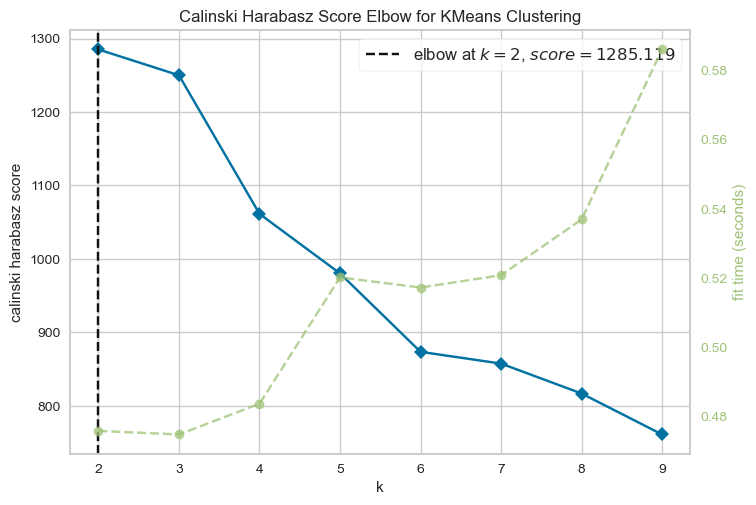

In [105]:
# Elbow Curve
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(sampled_data)      
visualizer.show()                            
plt.show()

### Silhouette Plot (for 9 clusters)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\yellowbrick\style\colors.py:104: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(colormap)
C:\Users\ASUS\anaconda3\Lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


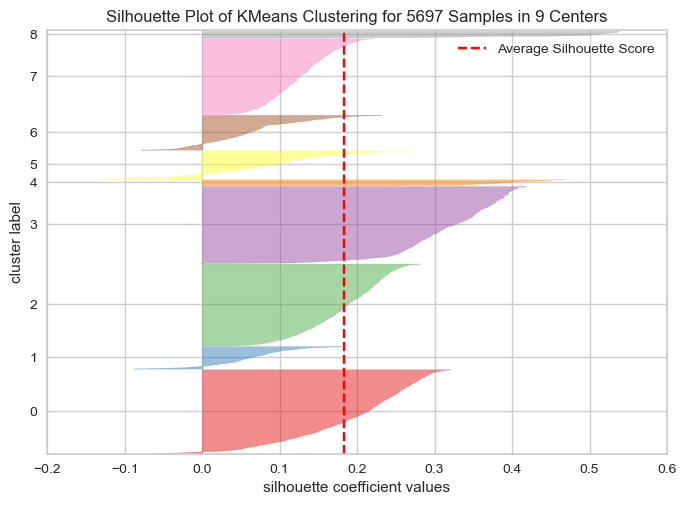

In [106]:
#SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model)

visualizer.fit(sampled_data)    
visualizer.poof()    
plt.show()

### Silhouette Plot (for 2 clusters)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\yellowbrick\style\colors.py:104: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(colormap)


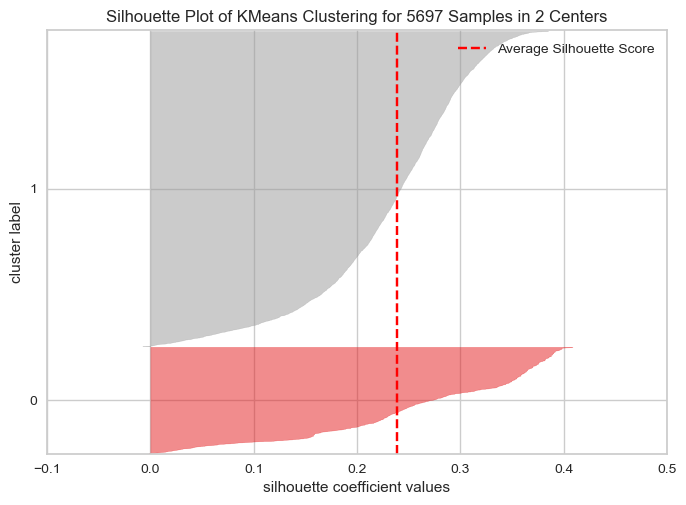

In [107]:
model = KMeans(n_clusters=2, random_state=0)

# Creating the SilhouetteVisualizer with the KMeans model
visualizer = SilhouetteVisualizer(model)

# Fitting the visualizer to the data
visualizer.fit(sampled_data)

# Displaying the silhouette plot
visualizer.show()
plt.show()


In [108]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [109]:
# giving the labels to each data point about the clsuter it belongs
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [110]:
# a new cluster column is created to store the labels of each data point
#appendding dataframe with cluster number
sampled_data['cluster'] = kmeans.labels_
sampled_data.head()

Region  Residence Type  Family Composition  Population Base  \
135914 -1.027515        0.138044           -0.245036        -0.117764   
1296   -1.793840        0.138044            2.920257        -0.117764   
313134 -1.410677        0.138044           -0.245036        -0.117764   
563622  0.505134        0.138044           -1.036359        -0.117764   
139683 -0.644353        0.138044           -0.245036        -0.117764   

             Sex       Age  Marital Status   Student  Country of Birth  \
135914 -1.015217  1.811822        0.127819  0.534327         -0.340141   
1296    0.985011  0.460161        1.905565  0.534327         -0.340141   
313134 -1.015217  0.009607        0.127819  0.534327         -0.340141   
563622 -1.015217 -0.440946       -0.761054  0.534327         -0.340141   
139683 -1.015217 -1.342053       -0.761054 -1.871512         -0.340141   

          Health  Ethnic Group  Religion  Economic Activity  Occupation  \
135914  2.388975     -0.356459 -0.242601           1.025713   -0.837355   
1296    0.250421     -0.356459 -0.242601           0.216604    1.087428   
313134  0.250421     -0.356459 -0.242601          -0.592505   -0.516558   
563622 -0.818856     -0.356459 -0.242601          -0.592505   -0.195760   
139683  0.250421     -0.356459 -0.242601          -0.997060   -1.158152   

        Industry  Hours worked per week  No of hours  \
135914 -0.206296              -0.872413    -0.834464   
1296   -0.206296              -0.872413    -0.834464   
313134 -0.703941              -0.195369    -0.381396   
563622  0.788992               1.835764     1.934285   
139683 -1.201585              -0.872413    -0.834464   

        Approximated Social Grade  cluster  
135914                   0.003839        1  
1296                     0.706602        1  
313134                  -0.698925        1  
563622                  -0.698925        1  
139683                  -1.401689        0

In [111]:
#viewing proterties of each cluster
cluster1=sampled_data.query("cluster == 0")
cluster2=sampled_data.query("cluster == 1")

In [112]:
cluster1.head()

Region  Residence Type  Family Composition  Population Base  \
139683 -0.644353        0.138044           -0.245036        -0.117764   
247697  0.505134        0.138044            2.128933        -0.117764   
12957  -1.027515        0.138044           -0.245036        -0.117764   
165644  0.888297        0.138044           -0.245036        -0.117764   
234438 -1.027515        0.138044           -0.245036        -0.117764   

             Sex       Age  Marital Status   Student  Country of Birth  \
139683 -1.015217 -1.342053       -0.761054 -1.871512         -0.340141   
247697 -1.015217 -1.342053       -0.761054 -1.871512         -0.340141   
12957   0.985011 -0.891500       -0.761054  0.534327         -0.340141   
165644 -1.015217 -1.342053       -0.761054  0.534327         -0.340141   
234438  0.985011 -1.342053       -0.761054  0.534327          2.409185   

          Health  Ethnic Group  Religion  Economic Activity  Occupation  \
139683  0.250421     -0.356459 -0.242601          -0.997060   -1.158152   
247697 -0.818856     -0.356459 -0.242601          -0.997060   -1.158152   
12957   0.250421     -0.356459 -0.703064           0.216604   -1.158152   
165644 -0.818856     -0.356459 -0.703064          -0.997060   -1.158152   
234438 -0.818856     -0.356459 -0.242601          -0.997060   -1.158152   

        Industry  Hours worked per week  No of hours  \
139683 -1.201585              -0.872413    -0.834464   
247697 -1.201585              -0.872413    -0.834464   
12957  -1.201585              -0.872413    -0.834464   
165644 -1.201585              -0.872413    -0.834464   
234438 -1.201585              -0.872413    -0.834464   

        Approximated Social Grade  cluster  
139683                  -1.401689        0  
247697                  -1.401689        0  
12957                    0.003839        0  
165644                  -1.401689        0  
234438                  -1.401689        0

In [113]:
cluster2.head()

Region  Residence Type  Family Composition  Population Base  \
135914 -1.027515        0.138044           -0.245036        -0.117764   
1296   -1.793840        0.138044            2.920257        -0.117764   
313134 -1.410677        0.138044           -0.245036        -0.117764   
563622  0.505134        0.138044           -1.036359        -0.117764   
269456  0.505134        0.138044            2.128933        -0.117764   

             Sex       Age  Marital Status   Student  Country of Birth  \
135914 -1.015217  1.811822        0.127819  0.534327         -0.340141   
1296    0.985011  0.460161        1.905565  0.534327         -0.340141   
313134 -1.015217  0.009607        0.127819  0.534327         -0.340141   
563622 -1.015217 -0.440946       -0.761054  0.534327         -0.340141   
269456  0.985011  1.361268        1.905565  0.534327          2.409185   

          Health  Ethnic Group  Religion  Economic Activity  Occupation  \
135914  2.388975     -0.356459 -0.242601           1.025713   -0.837355   
1296    0.250421     -0.356459 -0.242601           0.216604    1.087428   
313134  0.250421     -0.356459 -0.242601          -0.592505   -0.516558   
563622 -0.818856     -0.356459 -0.242601          -0.592505   -0.195760   
269456 -0.818856     -0.356459 -0.242601           1.025713   -0.837355   

        Industry  Hours worked per week  No of hours  \
135914 -0.206296              -0.872413    -0.834464   
1296   -0.206296              -0.872413    -0.834464   
313134 -0.703941              -0.195369    -0.381396   
563622  0.788992               1.835764     1.934285   
269456 -0.206296              -0.872413    -0.834464   

        Approximated Social Grade  cluster  
135914                   0.003839        1  
1296                     0.706602        1  
313134                  -0.698925        1  
563622                  -0.698925        1  
269456                   0.003839        1

In [114]:
cluster1.shape

(1436, 19)

In [115]:
cluster2.shape

(4261, 19)

In [116]:
cluster1.describe()

Region  Residence Type  Family Composition  Population Base  \
count  1436.000000     1436.000000         1436.000000      1436.000000   
mean      0.037121       -0.072727            0.305474         0.363832   
std       0.989471        1.229864            1.217700         1.988640   
min      -1.793840       -7.244075           -1.827682        -0.117764   
25%      -0.740143        0.138044           -0.245036        -0.117764   
50%       0.121972        0.138044           -0.245036        -0.117764   
75%       0.888297        0.138044            1.337610        -0.117764   
max       1.654621        0.138044            2.920257        12.456269   

               Sex          Age  Marital Status      Student  \
count  1436.000000  1436.000000     1436.000000  1436.000000   
mean     -0.059677    -1.209334       -0.751150    -1.392354   
std       0.999468     0.250730        0.114525     0.961159   
min      -1.015217    -1.342053       -0.761054    -1.871512   
25%      -1.015217    -1.342053       -0.761054    -1.871512   
50%      -1.015217    -1.342053       -0.761054    -1.871512   
75%       0.985011    -0.891500       -0.761054    -1.871512   
max       0.985011     0.910715        1.905565     0.534327   

       Country of Birth       Health  Ethnic Group     Religion  \
count       1436.000000  1436.000000   1436.000000  1436.000000   
mean          -0.179317    -0.584301      0.140455     0.001097   
std            1.069342     0.637394      1.213857     1.065505   
min           -3.089466    -1.888134     -1.549717    -1.163526   
25%           -0.340141    -0.818856     -0.356459    -0.703064   
50%           -0.340141    -0.818856     -0.356459    -0.242601   
75%           -0.340141    -0.818856     -0.356459    -0.242601   
max            2.409185     3.458252      4.416572     2.980635   

       Economic Activity   Occupation     Industry  Hours worked per week  \
count        1436.000000  1436.000000  1436.000000            1436.000000   
mean           -0.517285    -1.033943    -1.100046              -0.850254   
std             0.944720     0.493845     0.404846               0.153187   
min            -0.997060    -1.158152    -1.201585              -0.872413   
25%            -0.997060    -1.158152    -1.201585              -0.872413   
50%            -0.997060    -1.158152    -1.201585              -0.872413   
75%            -0.997060    -1.158152    -1.201585              -0.872413   
max             2.643931     1.729023     1.784281               1.158720   

       No of hours  Approximated Social Grade  cluster  
count  1436.000000                1436.000000   1436.0  
mean     -0.814552                  -1.141334      0.0  
std       0.145849                   0.563589      0.0  
min      -0.834464                  -1.401689      0.0  
25%      -0.834464                  -1.401689      0.0  
50%      -0.834464                  -1.401689      0.0  
75%      -0.834464                  -1.401689      0.0  
max       1.380535                   1.409366      0.0

In [117]:
cluster2.describe()

Region  Residence Type  Family Composition  Population Base  \
count  4261.000000     4261.000000         4261.000000      4261.000000   
mean     -0.004640        0.051420           -0.105751        -0.114813   
std       0.992811        0.795057            0.895542         0.192628   
min      -1.793840       -7.244075           -1.827682        -0.117764   
25%      -1.027515        0.138044           -0.245036        -0.117764   
50%       0.121972        0.138044           -0.245036        -0.117764   
75%       0.888297        0.138044           -0.245036        -0.117764   
max       1.654621        0.138044            2.920257        12.456269   

               Sex          Age  Marital Status      Student  \
count  4261.000000  4261.000000     4261.000000  4261.000000   
mean      0.043340     0.402110        0.244222     0.467138   
std       0.998522     0.807282        1.039394     0.396446   
min      -1.015217    -0.891500       -0.761054    -1.871512   
25%      -1.015217    -0.440946       -0.761054     0.534327   
50%       0.985011     0.460161        0.127819     0.534327   
75%       0.985011     0.910715        0.127819     0.534327   
max       0.985011     1.811822        2.794438     0.534327   

       Country of Birth       Health  Ethnic Group     Religion  \
count       4261.000000  4261.000000   4261.000000  4261.000000   
mean           0.075388     0.190445     -0.064935    -0.012100   
std            0.984879     1.018840      0.903571     0.967760   
min           -0.340141    -0.818856     -0.356459    -0.703064   
25%           -0.340141    -0.818856     -0.356459    -0.242601   
50%           -0.340141     0.250421     -0.356459    -0.242601   
75%           -0.340141     0.250421     -0.356459    -0.242601   
max            2.409185     3.458252      4.416572     2.980635   

       Economic Activity   Occupation     Industry  Hours worked per week  \
count        4261.000000  4261.000000  4261.000000            4261.000000   
mean            0.176253     0.335238     0.351670               0.295611   
std             0.963244     0.881539     0.850493               1.003425   
min            -0.592505    -1.158152    -1.201585              -0.872413   
25%            -0.592505    -0.516558    -0.206296              -0.872413   
50%            -0.592505     0.125037     0.291348               0.481675   
75%             1.025713     1.087428     1.037814               1.158720   
max             2.643931     1.729023     1.784281               1.835764   

       No of hours  Approximated Social Grade  cluster  
count  4261.000000                4261.000000   4261.0  
mean      0.286350                   0.378228      1.0  
std       1.020804                   0.799295      0.0  
min      -0.834464                  -1.401689      1.0  
25%      -0.834464                   0.003839      1.0  
50%       0.373717                   0.003839      1.0  
75%       1.229512                   1.409366      1.0  
max       2.185989                   1.409366      1.0

In [118]:
cluster1_mean = kmeans.cluster_centers_[0]
cluster2_mean = kmeans.cluster_centers_[1]

print("Cluster 1 Mean:", cluster1_mean)
print("Cluster 2 Mean:", cluster2_mean)

Cluster 1 Mean: [ 3.71211289e-02 -7.27269723e-02  3.05473617e-01  3.63831662e-01
 -5.96766757e-02 -1.20933433e+00 -7.51150205e-01 -1.39235445e+00
 -1.79316536e-01 -5.84300519e-01  1.40454857e-01  1.09729352e-03
 -5.17285365e-01 -1.03394345e+00 -1.10004617e+00 -8.50253698e-01
 -8.14552159e-01 -1.14133370e+00]
Cluster 2 Mean: [-0.00463989  0.05141958 -0.10575124 -0.11481336  0.0433403   0.40211036
  0.24422152  0.46713778  0.07538758  0.19044488 -0.06493547 -0.01210011
  0.1762526   0.3352376   0.35167005  0.29561139  0.28635027  0.37822816]


In [119]:
cluster1.keys()

Index(['Region', 'Residence Type', 'Family Composition', 'Population Base',
       'Sex', 'Age', 'Marital Status', 'Student', 'Country of Birth', 'Health',
       'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation',
       'Industry', 'Hours worked per week', 'No of hours',
       'Approximated Social Grade', 'cluster'],
      dtype='object')

In [120]:
cluster2.keys()

Index(['Region', 'Residence Type', 'Family Composition', 'Population Base',
       'Sex', 'Age', 'Marital Status', 'Student', 'Country of Birth', 'Health',
       'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation',
       'Industry', 'Hours worked per week', 'No of hours',
       'Approximated Social Grade', 'cluster'],
      dtype='object')

In [121]:
len(cluster1.keys())

19

In [122]:
len(cluster2.keys())

19

In [123]:
cluster1_mean_p1 = cluster1_mean[:10]
cluster1_mean_p1

array([ 0.03712113, -0.07272697,  0.30547362,  0.36383166, -0.05967668,
       -1.20933433, -0.75115021, -1.39235445, -0.17931654, -0.58430052])

In [124]:
cluster2_mean_p1 = cluster2_mean[:10]
cluster2_mean_p1

array([-0.00463989,  0.05141958, -0.10575124, -0.11481336,  0.0433403 ,
        0.40211036,  0.24422152,  0.46713778,  0.07538758,  0.19044488])

### Visualisation of mean values per attribute of the two clusters for the first 10 columns

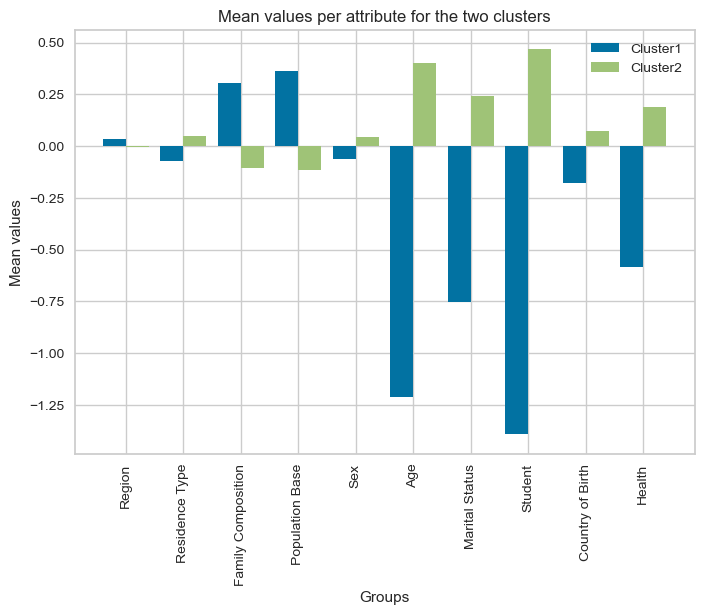

In [125]:
# viewing the first 10 columns
X = cluster1.keys()[:10]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p1, 0.4, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")

plt.ylabel("Mean values")
plt.title("Mean values per attribute for the two clusters")
plt.legend()
plt.show()

In [126]:
cluster1_mean_p2 = cluster1_mean[10:]
cluster1_mean_p2

array([ 1.40454857e-01,  1.09729352e-03, -5.17285365e-01, -1.03394345e+00,
       -1.10004617e+00, -8.50253698e-01, -8.14552159e-01, -1.14133370e+00])

In [127]:
cluster2_mean_p2 = cluster2_mean[10:]
cluster2_mean_p2

array([-0.06493547, -0.01210011,  0.1762526 ,  0.3352376 ,  0.35167005,
        0.29561139,  0.28635027,  0.37822816])

### Visualisation of mean values per attribute of the two clusters for  the last 8 columns

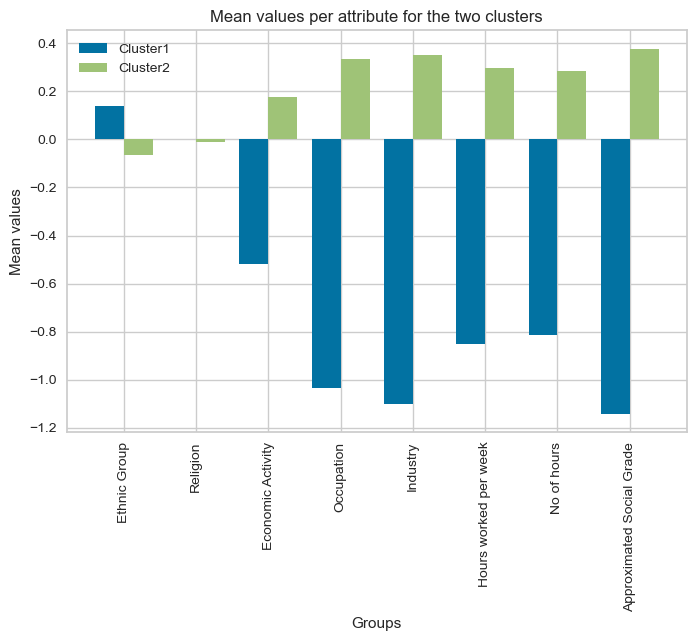

In [128]:
X = cluster1.keys()[10:-1]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p2, 0.4, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.ylabel("Mean values")
plt.title("Mean values per attribute for the two clusters")
plt.legend()
plt.show()

### 2.2 Clustering using 'AgglomerativeClustering'

###  Taking 1% sample of the census_num data

In [129]:
from sklearn.cluster import AgglomerativeClustering

X = scaled_features_census_num.sample(frac=0.01, replace=False, random_state=0)


### Inspecting the Silhouette Score for 2 clusters and single linkage

In [130]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='single')
cluster.fit(X)

AgglomerativeClustering(linkage='single', metric='euclidean')

In [131]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6121668241194588


### Inspecting the Silhouette Score for 2 clusters and average linkage

In [132]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')
cluster.fit(X)

AgglomerativeClustering(linkage='average', metric='euclidean')

In [133]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6121668241194588


### Inspecting the Silhouette Score for 2 clusters and complete linkage

In [134]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
cluster.fit(X)

AgglomerativeClustering(linkage='complete', metric='euclidean')

In [135]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4880765580838551


### Inspecting the Silhouette Score for 2 clusters and ward linkage

In [136]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(X)

AgglomerativeClustering(metric='euclidean')

In [137]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.214982959682993


### Inspecting the Silhouette Score for 3 clusters and single linkage

In [138]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
cluster.fit(X)

AgglomerativeClustering(linkage='single', metric='euclidean', n_clusters=3)

In [139]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5975444595007438


### Inspecting the Silhouette Score for 3 clusters and average linkage

In [140]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
cluster.fit(X)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=3)

In [141]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.43516828004522273


### Inspecting the Silhouette Score for 3 clusters and complete linkage

In [142]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
cluster.fit(X)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

In [143]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4236411318516746


### Inspecting the Silhouette Score for 3 clusters and ward linkage

In [144]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster.fit(X)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [145]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.18533414723559496


In [146]:
#plt.scatter(X['Occupation'],X['No of hours'], c=cluster.labels_, cmap='rainbow')

### Dendogram to visualise the hierarchical clustering of all the levels for 2 clusters

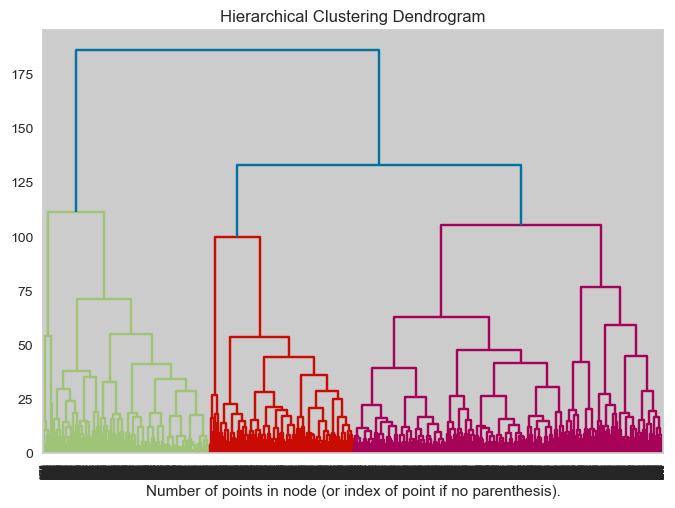

In [147]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np

# intiliasing the model
cluster = AgglomerativeClustering(n_clusters=2, compute_distances=True, compute_full_tree=True,linkage='ward')
cluster.fit(X)  

# Plotting the dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

  
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

   
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(cluster)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


###  Dendogram to visualise the hierarchical clustering of all the levels for 3 clusters

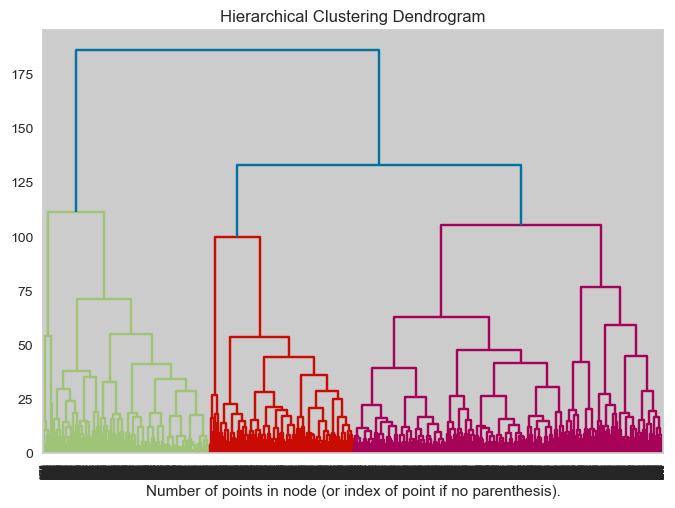

In [148]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np

# intiliasing the model
cluster = AgglomerativeClustering(n_clusters=3, compute_distances=True, compute_full_tree=True,linkage='ward')
cluster.fit(X)  

# Plotting the dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

  
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

   
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(cluster)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

###  Dendogram to visualise the hierarchical clutering of the top 4 levels for 2 cluster and ward linkage

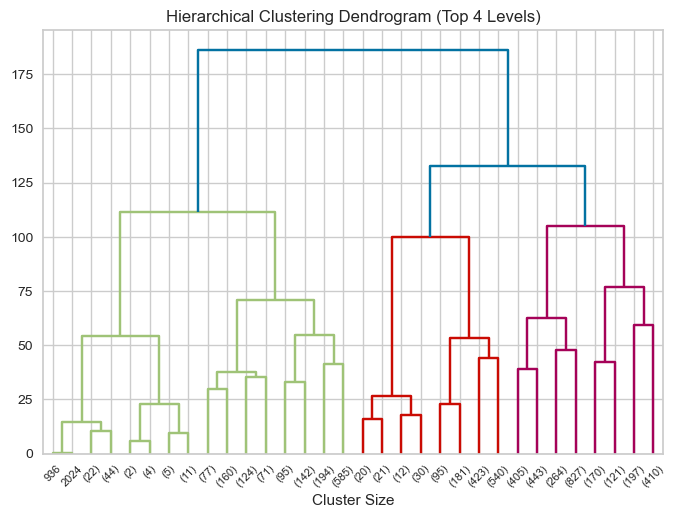

In [149]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np

# intialising the model
cluster = AgglomerativeClustering(n_clusters=2, compute_distances=True, compute_full_tree=True,linkage='ward')
cluster.fit(X)  # Replace `data` with your actual dataset

# Plotting the dendrogram
def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram (Top 4 Levels)")
plot_dendrogram(cluster, truncate_mode="level", p=4)
plt.xlabel("Cluster Size")
plt.show()

### Dendogram to visualise the hierarchical clustering of the top 4 levels for 3 clusters and ward linkage


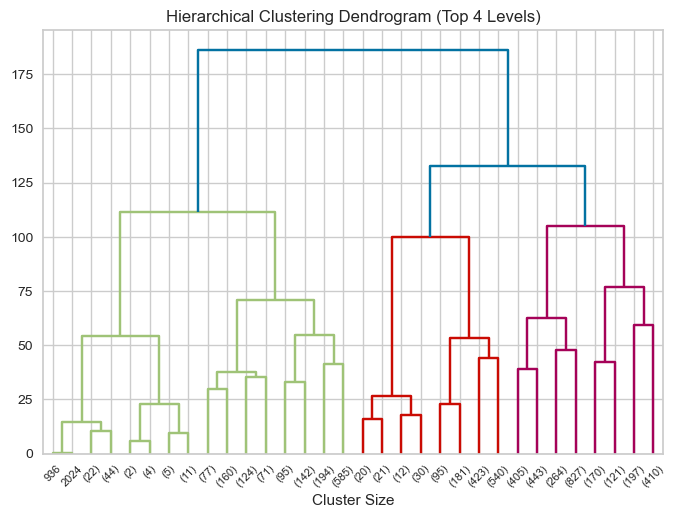

In [150]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np

# Intialising the model
cluster = AgglomerativeClustering(n_clusters=3, compute_distances=True, compute_full_tree=True,linkage='ward')
cluster.fit(X)  # Replace `data` with your actual dataset

# Plotting the dendrogram
def plot_dendrogram(model, **kwargs):
   
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

   
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram (Top 4 Levels)")
plot_dendrogram(cluster, truncate_mode="level", p=4)
plt.xlabel("Cluster Size")
plt.show()

In [151]:
cluster.labels_

array([2, 2, 2, ..., 1, 1, 0], dtype=int64)

In [152]:
#appending dataframe with cluster number
X['cluster_no'] = cluster.labels_

In [153]:
X.head()

Region  Residence Type  Family Composition  Population Base  \
135914 -1.027515        0.138044           -0.245036        -0.117764   
1296   -1.793840        0.138044            2.920257        -0.117764   
313134 -1.410677        0.138044           -0.245036        -0.117764   
563622  0.505134        0.138044           -1.036359        -0.117764   
139683 -0.644353        0.138044           -0.245036        -0.117764   

             Sex       Age  Marital Status   Student  Country of Birth  \
135914 -1.015217  1.811822        0.127819  0.534327         -0.340141   
1296    0.985011  0.460161        1.905565  0.534327         -0.340141   
313134 -1.015217  0.009607        0.127819  0.534327         -0.340141   
563622 -1.015217 -0.440946       -0.761054  0.534327         -0.340141   
139683 -1.015217 -1.342053       -0.761054 -1.871512         -0.340141   

          Health  Ethnic Group  Religion  Economic Activity  Occupation  \
135914  2.388975     -0.356459 -0.242601           1.025713   -0.837355   
1296    0.250421     -0.356459 -0.242601           0.216604    1.087428   
313134  0.250421     -0.356459 -0.242601          -0.592505   -0.516558   
563622 -0.818856     -0.356459 -0.242601          -0.592505   -0.195760   
139683  0.250421     -0.356459 -0.242601          -0.997060   -1.158152   

        Industry  Hours worked per week  No of hours  \
135914 -0.206296              -0.872413    -0.834464   
1296   -0.206296              -0.872413    -0.834464   
313134 -0.703941              -0.195369    -0.381396   
563622  0.788992               1.835764     1.934285   
139683 -1.201585              -0.872413    -0.834464   

        Approximated Social Grade  cluster_no  
135914                   0.003839           2  
1296                     0.706602           2  
313134                  -0.698925           2  
563622                  -0.698925           1  
139683                  -1.401689           0

In [154]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.199566573428184


In [155]:
X.describe()

Region  Residence Type  Family Composition  Population Base  \
count  5697.000000     5697.000000         5697.000000      5697.000000   
mean      0.005886        0.020127           -0.002097         0.005835   
std       0.992049        0.925593            1.002624         1.033083   
min      -1.793840       -7.244075           -1.827682        -0.117764   
25%      -1.027515        0.138044           -0.245036        -0.117764   
50%       0.121972        0.138044           -0.245036        -0.117764   
75%       0.888297        0.138044            0.546287        -0.117764   
max       1.654621        0.138044            2.920257        12.456269   

               Sex          Age  Marital Status      Student  \
count  5697.000000  5697.000000     5697.000000  5697.000000   
mean      0.017374    -0.004074       -0.006674    -0.001570   
std       0.999674     0.996437        0.999051     1.001136   
min      -1.015217    -1.342053       -0.761054    -1.871512   
25%      -1.015217    -0.891500       -0.761054     0.534327   
50%       0.985011     0.009607        0.127819     0.534327   
75%       0.985011     0.910715        0.127819     0.534327   
max       0.985011     1.811822        2.794438     0.534327   

       Country of Birth       Health  Ethnic Group     Religion  \
count       5697.000000  5697.000000   5697.000000  5697.000000   
mean           0.011186    -0.004839     -0.013164    -0.008774   
std            1.012798     0.995927      0.994873     0.993225   
min           -3.089466    -1.888134     -1.549717    -1.163526   
25%           -0.340141    -0.818856     -0.356459    -0.703064   
50%           -0.340141     0.250421     -0.356459    -0.242601   
75%           -0.340141     0.250421     -0.356459    -0.242601   
max            2.409185     3.458252      4.416572     2.980635   

       Economic Activity   Occupation     Industry  Hours worked per week  \
count        5697.000000  5697.000000  5697.000000            5697.000000   
mean            0.001438    -0.009882    -0.014253               0.006782   
std             1.004723     0.998060     0.989776               1.003254   
min            -0.997060    -1.158152    -1.201585              -0.872413   
25%            -0.592505    -1.158152    -1.201585              -0.872413   
50%            -0.592505    -0.195760    -0.206296              -0.872413   
75%             1.025713     0.766631     0.788992               1.158720   
max             2.643931     1.729023     1.784281               1.835764   

       No of hours  Approximated Social Grade   cluster_no  
count  5697.000000                5697.000000  5697.000000  
mean      0.008854                  -0.004796     0.962085  
std       1.006592                   0.996609     0.707580  
min      -0.834464                  -1.401689     0.000000  
25%      -0.834464                  -0.698925     0.000000  
50%      -0.834464                   0.003839     1.000000  
75%       0.977808                   0.706602     1.000000  
max       2.185989                   1.409366     2.000000

In [156]:
#save each cluster data separately
cluster1=X.query("cluster_no == 0")
cluster2=X.query("cluster_no == 1")
cluster3=X.query("cluster_no == 2")

In [157]:
cluster1.head()

Region  Residence Type  Family Composition  Population Base  \
139683 -0.644353        0.138044           -0.245036        -0.117764   
247697  0.505134        0.138044            2.128933        -0.117764   
12957  -1.027515        0.138044           -0.245036        -0.117764   
165644  0.888297        0.138044           -0.245036        -0.117764   
234438 -1.027515        0.138044           -0.245036        -0.117764   

             Sex       Age  Marital Status   Student  Country of Birth  \
139683 -1.015217 -1.342053       -0.761054 -1.871512         -0.340141   
247697 -1.015217 -1.342053       -0.761054 -1.871512         -0.340141   
12957   0.985011 -0.891500       -0.761054  0.534327         -0.340141   
165644 -1.015217 -1.342053       -0.761054  0.534327         -0.340141   
234438  0.985011 -1.342053       -0.761054  0.534327          2.409185   

          Health  Ethnic Group  Religion  Economic Activity  Occupation  \
139683  0.250421     -0.356459 -0.242601          -0.997060   -1.158152   
247697 -0.818856     -0.356459 -0.242601          -0.997060   -1.158152   
12957   0.250421     -0.356459 -0.703064           0.216604   -1.158152   
165644 -0.818856     -0.356459 -0.703064          -0.997060   -1.158152   
234438 -0.818856     -0.356459 -0.242601          -0.997060   -1.158152   

        Industry  Hours worked per week  No of hours  \
139683 -1.201585              -0.872413    -0.834464   
247697 -1.201585              -0.872413    -0.834464   
12957  -1.201585              -0.872413    -0.834464   
165644 -1.201585              -0.872413    -0.834464   
234438 -1.201585              -0.872413    -0.834464   

        Approximated Social Grade  cluster_no  
139683                  -1.401689           0  
247697                  -1.401689           0  
12957                    0.003839           0  
165644                  -1.401689           0  
234438                  -1.401689           0

In [158]:
cluster2.head()

Region  Residence Type  Family Composition  Population Base  \
563622  0.505134        0.138044           -1.036359        -0.117764   
407215 -1.410677        0.138044           -1.036359        -0.117764   
439107  0.888297        0.138044           -1.036359        -0.117764   
437759  0.888297        0.138044           -1.036359        -0.117764   
481156 -1.410677        0.138044           -1.036359        -0.117764   

             Sex       Age  Marital Status   Student  Country of Birth  \
563622 -1.015217 -0.440946       -0.761054  0.534327         -0.340141   
407215 -1.015217  0.009607        1.016692  0.534327         -0.340141   
439107 -1.015217  0.009607       -0.761054  0.534327         -0.340141   
437759  0.985011  1.811822        2.794438  0.534327         -0.340141   
481156  0.985011 -0.440946       -0.761054  0.534327         -0.340141   

          Health  Ethnic Group  Religion  Economic Activity  Occupation  \
563622 -0.818856     -0.356459 -0.242601          -0.592505   -0.195760   
407215 -0.818856     -0.356459 -0.242601          -0.592505    1.408225   
439107 -0.818856     -0.356459 -0.703064          -0.592505   -0.195760   
437759  1.319698     -0.356459  2.980635          -0.592505    0.766631   
481156 -0.818856     -0.356459 -0.242601          -0.592505   -0.195760   

        Industry  Hours worked per week  No of hours  \
563622  0.788992               1.835764     1.934285   
407215  0.291348               1.158720     1.279853   
439107  1.037814               1.158720     1.380535   
437759  1.535458               1.158720     1.581899   
481156  1.037814               1.158720     1.430876   

        Approximated Social Grade  cluster_no  
563622                  -0.698925           1  
407215                   0.706602           1  
439107                   0.003839           1  
437759                   0.003839           1  
481156                   0.003839           1

In [159]:
cluster3.head()

Region  Residence Type  Family Composition  Population Base  \
135914 -1.027515        0.138044           -0.245036        -0.117764   
1296   -1.793840        0.138044            2.920257        -0.117764   
313134 -1.410677        0.138044           -0.245036        -0.117764   
269456  0.505134        0.138044            2.128933        -0.117764   
210930 -0.261190        0.138044           -0.245036        -0.117764   

             Sex       Age  Marital Status   Student  Country of Birth  \
135914 -1.015217  1.811822        0.127819  0.534327         -0.340141   
1296    0.985011  0.460161        1.905565  0.534327         -0.340141   
313134 -1.015217  0.009607        0.127819  0.534327         -0.340141   
269456  0.985011  1.361268        1.905565  0.534327          2.409185   
210930  0.985011  1.811822        0.127819  0.534327         -0.340141   

          Health  Ethnic Group  Religion  Economic Activity  Occupation  \
135914  2.388975     -0.356459 -0.242601           1.025713   -0.837355   
1296    0.250421     -0.356459 -0.242601           0.216604    1.087428   
313134  0.250421     -0.356459 -0.242601          -0.592505   -0.516558   
269456 -0.818856     -0.356459 -0.242601           1.025713   -0.837355   
210930  1.319698     -0.356459 -0.242601           1.025713    0.445834   

        Industry  Hours worked per week  No of hours  \
135914 -0.206296              -0.872413    -0.834464   
1296   -0.206296              -0.872413    -0.834464   
313134 -0.703941              -0.195369    -0.381396   
269456 -0.206296              -0.872413    -0.834464   
210930 -0.703941              -0.872413    -0.834464   

        Approximated Social Grade  cluster_no  
135914                   0.003839           2  
1296                     0.706602           2  
313134                  -0.698925           2  
269456                   0.003839           2  
210930                   1.409366           2

In [160]:
cluster1.shape

(1538, 19)

In [161]:
cluster2.shape

(2837, 19)

In [162]:
cluster3.shape

(1322, 19)

In [163]:
cluster1.describe()

Region  Residence Type  Family Composition  Population Base  \
count  1538.000000     1538.000000         1538.000000      1538.000000   
mean      0.021572        0.099645            0.339967         0.340068   
std       0.992634        0.531198            1.179444         1.949887   
min      -1.793840       -7.244075           -1.827682        -0.117764   
25%      -1.027515        0.138044           -0.245036        -0.117764   
50%       0.121972        0.138044           -0.245036        -0.117764   
75%       0.888297        0.138044            1.337610        -0.117764   
max       1.654621        0.138044            2.920257        12.456269   

               Sex          Age  Marital Status      Student  \
count  1538.000000  1538.000000     1538.000000  1538.000000   
mean     -0.009901    -1.133767       -0.731001    -1.302119   
std       1.000426     0.417271        0.181724     1.022907   
min      -1.015217    -1.342053       -0.761054    -1.871512   
25%      -1.015217    -1.342053       -0.761054    -1.871512   
50%       0.985011    -1.342053       -0.761054    -1.871512   
75%       0.985011    -0.891500       -0.761054    -1.871512   
max       0.985011     1.811822        1.905565     0.534327   

       Country of Birth       Health  Ethnic Group     Religion  \
count       1538.000000  1538.000000   1538.000000  1538.000000   
mean          -0.248973    -0.494875      0.037673    -0.034226   
std            0.959773     0.751309      1.098342     1.034840   
min           -3.089466    -1.888134     -1.549717    -1.163526   
25%           -0.340141    -0.818856     -0.356459    -0.703064   
50%           -0.340141    -0.818856     -0.356459    -0.242601   
75%           -0.340141     0.250421     -0.356459    -0.242601   
max            2.409185     3.458252      4.416572     2.980635   

       Economic Activity   Occupation     Industry  Hours worked per week  \
count        1538.000000  1538.000000  1538.000000            1538.000000   
mean           -0.398908    -0.921204    -0.999033              -0.799338   
std             1.039401     0.688944     0.590924               0.315651   
min            -0.997060    -1.158152    -1.201585              -0.872413   
25%            -0.997060    -1.158152    -1.201585              -0.872413   
50%            -0.997060    -1.158152    -1.201585              -0.872413   
75%             0.621158    -1.158152    -1.201585              -0.872413   
max             2.643931     1.729023     1.784281               1.835764   

       No of hours  Approximated Social Grade  cluster_no  
count  1538.000000                1538.000000      1538.0  
mean     -0.770212                  -0.985423         0.0  
std       0.290786                   0.757424         0.0  
min      -0.834464                  -1.401689         0.0  
25%      -0.834464                  -1.401689         0.0  
50%      -0.834464                  -1.401689         0.0  
75%      -0.834464                  -0.171852         0.0  
max       1.732921                   1.409366         0.0

In [164]:
cluster2.describe()

Region  Residence Type  Family Composition  Population Base  \
count  2837.000000    2.837000e+03         2837.000000     2.837000e+03   
mean      0.018517    1.380438e-01            0.005443    -1.177643e-01   
std       0.974042    8.328141e-16            0.915723     1.485185e-15   
min      -1.793840    1.380438e-01           -1.036359    -1.177643e-01   
25%      -1.027515    1.380438e-01           -0.245036    -1.177643e-01   
50%       0.121972    1.380438e-01           -0.245036    -1.177643e-01   
75%       0.888297    1.380438e-01            0.546287    -1.177643e-01   
max       1.654621    1.380438e-01            2.920257    -1.177643e-01   

               Sex          Age  Marital Status      Student  \
count  2837.000000  2837.000000     2837.000000  2837.000000   
mean     -0.002060     0.139358        0.090848     0.481750   
std       1.000205     0.644868        0.898396     0.351812   
min      -1.015217    -0.891500       -0.761054    -1.871512   
25%      -1.015217    -0.440946       -0.761054     0.534327   
50%       0.985011     0.009607        0.127819     0.534327   
75%       0.985011     0.460161        0.127819     0.534327   
max       0.985011     1.811822        2.794438     0.534327   

       Country of Birth       Health  Ethnic Group     Religion  \
count       2837.000000  2837.000000   2837.000000  2837.000000   
mean           0.208368    -0.076355      0.102001     0.140603   
std            1.098905     0.849510      1.106639     1.134643   
min           -0.340141    -0.818856     -0.356459    -0.703064   
25%           -0.340141    -0.818856     -0.356459    -0.242601   
50%           -0.340141     0.250421     -0.356459    -0.242601   
75%           -0.340141     0.250421     -0.356459    -0.242601   
max            2.409185     3.458252      4.416572     2.980635   

       Economic Activity   Occupation     Industry  Hours worked per week  \
count        2837.000000  2837.000000  2837.000000            2837.000000   
mean           -0.299036     0.256092     0.406067               0.821033   
std             0.679005     0.848483     0.830352               0.778667   
min            -0.592505    -1.158152    -1.201585              -0.872413   
25%            -0.592505    -0.516558    -0.206296               0.481675   
50%            -0.592505     0.125037     0.291348               1.158720   
75%            -0.187951     1.087428     1.286636               1.158720   
max             2.643931     1.729023     1.784281               1.835764   

       No of hours  Approximated Social Grade  cluster_no  
count  2837.000000                2837.000000      2837.0  
mean      0.800346                   0.310508         1.0  
std       0.843067                   0.766276         0.0  
min      -0.834464                  -0.698925         1.0  
25%       0.323376                   0.003839         1.0  
50%       0.977808                   0.003839         1.0  
75%       1.430876                   0.706602         1.0  
max       2.185989                   1.409366         1.0

In [165]:
cluster3.describe()

Region  Residence Type  Family Composition  Population Base  \
count  1322.000000     1322.000000         1322.000000     1.322000e+03   
mean     -0.039466       -0.325433           -0.416230    -1.177643e-01   
std       1.028409        1.791384            0.779593     3.609590e-15   
min      -1.793840       -7.244075           -1.827682    -1.177643e-01   
25%      -1.027515        0.138044           -1.036359    -1.177643e-01   
50%       0.121972        0.138044           -0.245036    -1.177643e-01   
75%       0.888297        0.138044           -0.245036    -1.177643e-01   
max       1.654621        0.138044            2.920257    -1.177643e-01   

               Sex          Age  Marital Status      Student  \
count  1322.000000  1322.000000     1322.000000  1322.000000   
mean      0.090809     1.002393        0.626717     0.474272   
std       0.994867     0.801296        1.224650     0.375477   
min      -1.015217    -1.342053       -0.761054    -1.871512   
25%      -1.015217     0.460161        0.127819     0.534327   
50%       0.985011     1.361268        0.127819     0.534327   
75%       0.985011     1.811822        1.905565     0.534327   
max       0.985011     1.811822        2.794438     0.534327   

       Country of Birth       Health  Ethnic Group     Religion  \
count       1322.000000  1322.000000   1322.000000  1322.000000   
mean          -0.109297     0.718735     -0.319452    -0.299724   
std            0.762768     1.120817      0.331134     0.332222   
min           -0.340141    -0.818856     -0.356459    -0.703064   
25%           -0.340141     0.250421     -0.356459    -0.242601   
50%           -0.340141     0.250421     -0.356459    -0.242601   
75%           -0.340141     1.319698     -0.356459    -0.242601   
max            2.409185     3.458252      4.416572     2.980635   

       Economic Activity   Occupation     Industry  Hours worked per week  \
count        1322.000000  1322.000000  1322.000000            1322.000000   
mean            1.112010     0.479564     0.229425              -0.802763   
std             0.700784     0.915828     0.877335               0.293359   
min            -0.997060    -1.158152    -1.201585              -0.872413   
25%             1.025713    -0.195760    -0.703941              -0.872413   
50%             1.025713     0.445834     0.042526              -0.872413   
75%             1.025713     1.408225     1.037814              -0.872413   
max             2.643931     1.729023     1.784281               1.835764   

       No of hours  Approximated Social Grade  cluster_no  
count  1322.000000                1322.000000      1322.0  
mean     -0.783324                   0.459412         2.0  
std       0.254100                   0.897689         0.0  
min      -0.834464                  -1.401689         2.0  
25%      -0.834464                   0.003839         2.0  
50%      -0.834464                   0.706602         2.0  
75%      -0.834464                   1.409366         2.0  
max       2.034967                   1.409366         2.0

In [166]:
cluster1_mean = np.array(cluster1.mean())
cluster2_mean = np.array(cluster2.mean())
cluster3_mean = np.array(cluster3.mean())

In [167]:
cluster1_mean


array([ 0.02157235,  0.0996453 ,  0.33996686,  0.34006784, -0.00990119,
       -1.1337673 , -0.73100116, -1.30211946, -0.24897309, -0.49487519,
        0.03767306, -0.03422577, -0.39890849, -0.92120411, -0.99903279,
       -0.79933822, -0.77021242, -0.98542261,  0.        ])

In [168]:
cluster2_mean

array([ 0.01851666,  0.13804384,  0.00544274, -0.11776432, -0.00205991,
        0.13935802,  0.09084789,  0.48174999,  0.20836775, -0.07635517,
        0.10200109,  0.14060323, -0.29903587,  0.25609209,  0.40606731,
        0.82103287,  0.80034617,  0.31050819,  1.        ])

In [169]:
cluster3_mean

array([-0.03946645, -0.32543263, -0.41622996, -0.11776432,  0.09080888,
        1.002393  ,  0.6267175 ,  0.47427238, -0.10929708,  0.71873508,
       -0.31945167, -0.2997239 ,  1.11200951,  0.47956375,  0.22942456,
       -0.80276268, -0.7833236 ,  0.45941244,  2.        ])

In [170]:
cluster1_mean_p1 = cluster1_mean[:10]
cluster2_mean_p1 = cluster2_mean[:10]
cluster3_mean_p1 = cluster3_mean[:10]

### Visualisation of mean values per attribute of the three clusters for the first 10 columns

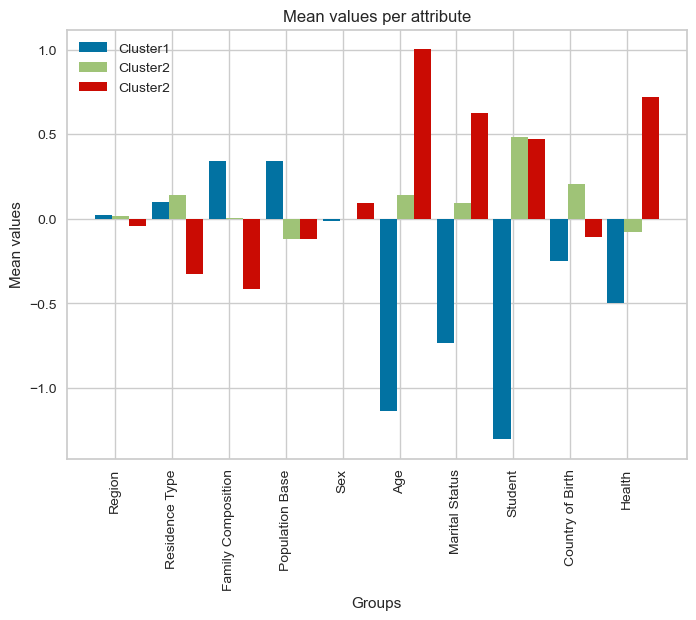

In [171]:
X = cluster1.keys()[:10]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p1, 0.3, label = 'Cluster2')
plt.bar(X_axis + 0.4, cluster3_mean_p1, 0.3, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()


In [172]:
cluster1_mean_p2 = cluster1_mean[10:-1]
cluster2_mean_p2 = cluster2_mean[10:-1]
cluster3_mean_p2 = cluster3_mean[10:-1]

### Visualisation of mean values per attribute of the three clusters for the last 8 columns

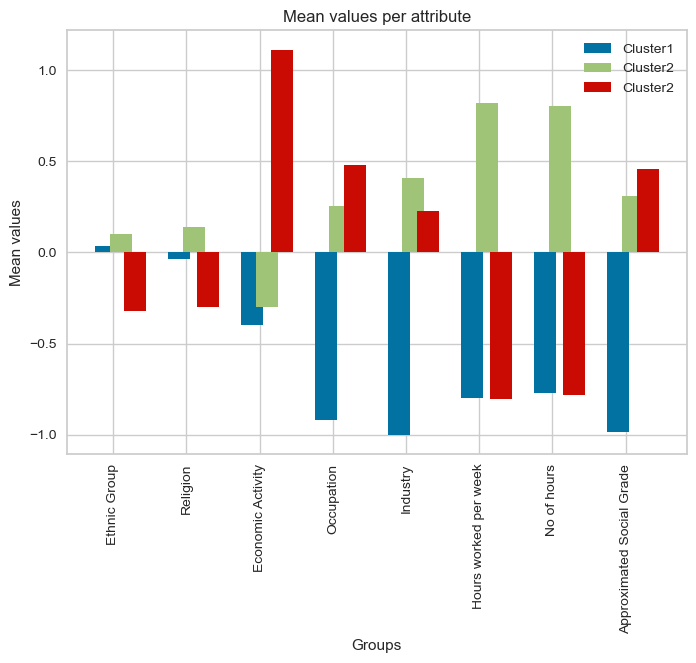

In [173]:

X = cluster1.keys()[10:-1]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, cluster1_mean_p2, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p2, 0.3, label = 'Cluster2')
plt.bar(X_axis + 0.3, cluster3_mean_p2, 0.3, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

### 2.3 Clustering using 'KMedoids'

In [174]:
from sklearn_extra.cluster import KMedoids
# Fitting KMedoids on the sampled data
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids.fit(sampled_data)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn_extra\cluster\_commonnn.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.23.0"):
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn_extra\cluster\_commonnn.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.23.0"):


KMedoids(n_clusters=2, random_state=0)

In [175]:
# viewing the cluster centers
kmedoids.labels_

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [176]:
# Computing the silhouette score using the sampled data
kmedoids_silhouette = silhouette_score(sampled_data, kmedoids.labels_).round(2)
print(kmedoids_silhouette)

0.14


### Elbow Curve

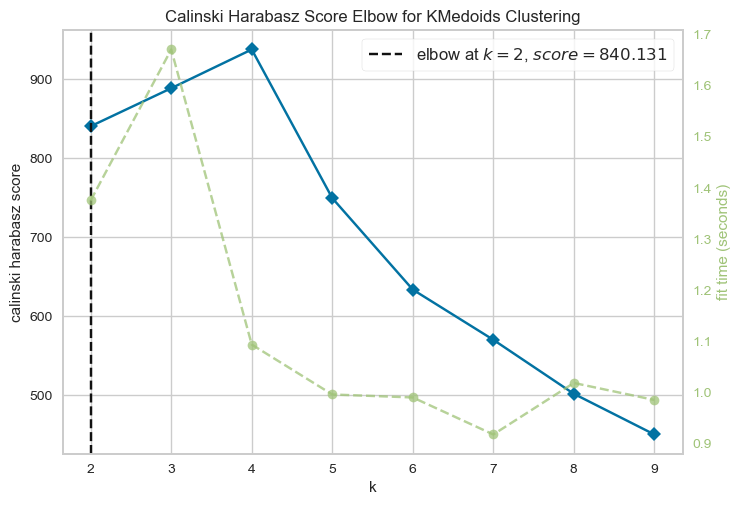

In [177]:
# Elbow Curve
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# initialising the model
model = KMedoids()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(sampled_data)     
visualizer.show()                            
plt.show()

In [178]:
# using k=2

In [179]:
# Fitting KMedoids on the sampled data
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids.fit(sampled_data)

KMedoids(n_clusters=2, random_state=0)

In [180]:
kmedoids.labels_

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [181]:
# a new cluster column is created to store the labels of each data point
#appending dataframe with cluster number
sampled_data['cluster'] = kmedoids.labels_
sampled_data.head()

Region  Residence Type  Family Composition  Population Base  \
135914 -1.027515        0.138044           -0.245036        -0.117764   
1296   -1.793840        0.138044            2.920257        -0.117764   
313134 -1.410677        0.138044           -0.245036        -0.117764   
563622  0.505134        0.138044           -1.036359        -0.117764   
139683 -0.644353        0.138044           -0.245036        -0.117764   

             Sex       Age  Marital Status   Student  Country of Birth  \
135914 -1.015217  1.811822        0.127819  0.534327         -0.340141   
1296    0.985011  0.460161        1.905565  0.534327         -0.340141   
313134 -1.015217  0.009607        0.127819  0.534327         -0.340141   
563622 -1.015217 -0.440946       -0.761054  0.534327         -0.340141   
139683 -1.015217 -1.342053       -0.761054 -1.871512         -0.340141   

          Health  Ethnic Group  Religion  Economic Activity  Occupation  \
135914  2.388975     -0.356459 -0.242601           1.025713   -0.837355   
1296    0.250421     -0.356459 -0.242601           0.216604    1.087428   
313134  0.250421     -0.356459 -0.242601          -0.592505   -0.516558   
563622 -0.818856     -0.356459 -0.242601          -0.592505   -0.195760   
139683  0.250421     -0.356459 -0.242601          -0.997060   -1.158152   

        Industry  Hours worked per week  No of hours  \
135914 -0.206296              -0.872413    -0.834464   
1296   -0.206296              -0.872413    -0.834464   
313134 -0.703941              -0.195369    -0.381396   
563622  0.788992               1.835764     1.934285   
139683 -1.201585              -0.872413    -0.834464   

        Approximated Social Grade  cluster  
135914                   0.003839        1  
1296                     0.706602        1  
313134                  -0.698925        1  
563622                  -0.698925        0  
139683                  -1.401689        1

In [182]:
#viewing proterties of each cluster
cluster1=sampled_data.query("cluster == 0")
cluster2=sampled_data.query("cluster == 1")

In [183]:
cluster1.head()

Region  Residence Type  Family Composition  Population Base  \
563622  0.505134        0.138044           -1.036359        -0.117764   
407215 -1.410677        0.138044           -1.036359        -0.117764   
439107  0.888297        0.138044           -1.036359        -0.117764   
437759  0.888297        0.138044           -1.036359        -0.117764   
481156 -1.410677        0.138044           -1.036359        -0.117764   

             Sex       Age  Marital Status   Student  Country of Birth  \
563622 -1.015217 -0.440946       -0.761054  0.534327         -0.340141   
407215 -1.015217  0.009607        1.016692  0.534327         -0.340141   
439107 -1.015217  0.009607       -0.761054  0.534327         -0.340141   
437759  0.985011  1.811822        2.794438  0.534327         -0.340141   
481156  0.985011 -0.440946       -0.761054  0.534327         -0.340141   

          Health  Ethnic Group  Religion  Economic Activity  Occupation  \
563622 -0.818856     -0.356459 -0.242601          -0.592505   -0.195760   
407215 -0.818856     -0.356459 -0.242601          -0.592505    1.408225   
439107 -0.818856     -0.356459 -0.703064          -0.592505   -0.195760   
437759  1.319698     -0.356459  2.980635          -0.592505    0.766631   
481156 -0.818856     -0.356459 -0.242601          -0.592505   -0.195760   

        Industry  Hours worked per week  No of hours  \
563622  0.788992               1.835764     1.934285   
407215  0.291348               1.158720     1.279853   
439107  1.037814               1.158720     1.380535   
437759  1.535458               1.158720     1.581899   
481156  1.037814               1.158720     1.430876   

        Approximated Social Grade  cluster  
563622                  -0.698925        0  
407215                   0.706602        0  
439107                   0.003839        0  
437759                   0.003839        0  
481156                   0.003839        0

In [184]:
cluster2.head()

Region  Residence Type  Family Composition  Population Base  \
135914 -1.027515        0.138044           -0.245036        -0.117764   
1296   -1.793840        0.138044            2.920257        -0.117764   
313134 -1.410677        0.138044           -0.245036        -0.117764   
139683 -0.644353        0.138044           -0.245036        -0.117764   
269456  0.505134        0.138044            2.128933        -0.117764   

             Sex       Age  Marital Status   Student  Country of Birth  \
135914 -1.015217  1.811822        0.127819  0.534327         -0.340141   
1296    0.985011  0.460161        1.905565  0.534327         -0.340141   
313134 -1.015217  0.009607        0.127819  0.534327         -0.340141   
139683 -1.015217 -1.342053       -0.761054 -1.871512         -0.340141   
269456  0.985011  1.361268        1.905565  0.534327          2.409185   

          Health  Ethnic Group  Religion  Economic Activity  Occupation  \
135914  2.388975     -0.356459 -0.242601           1.025713   -0.837355   
1296    0.250421     -0.356459 -0.242601           0.216604    1.087428   
313134  0.250421     -0.356459 -0.242601          -0.592505   -0.516558   
139683  0.250421     -0.356459 -0.242601          -0.997060   -1.158152   
269456 -0.818856     -0.356459 -0.242601           1.025713   -0.837355   

        Industry  Hours worked per week  No of hours  \
135914 -0.206296              -0.872413    -0.834464   
1296   -0.206296              -0.872413    -0.834464   
313134 -0.703941              -0.195369    -0.381396   
139683 -1.201585              -0.872413    -0.834464   
269456 -0.206296              -0.872413    -0.834464   

        Approximated Social Grade  cluster  
135914                   0.003839        1  
1296                     0.706602        1  
313134                  -0.698925        1  
139683                  -1.401689        1  
269456                   0.003839        1

In [185]:
cluster1.shape

(2704, 19)

In [186]:
cluster2.shape

(2993, 19)

In [187]:
cluster1.describe()

Region  Residence Type  Family Composition  Population Base  \
count  2704.000000     2704.000000         2704.000000      2704.000000   
mean      0.096749        0.097093           -0.067105        -0.094514   
std       0.978897        0.548398            0.870011         0.540300   
min      -1.793840       -7.244075           -1.827682        -0.117764   
25%      -0.644353        0.138044           -0.245036        -0.117764   
50%       0.121972        0.138044           -0.245036        -0.117764   
75%       0.888297        0.138044            0.546287        -0.117764   
max       1.654621        0.138044            2.920257        12.456269   

               Sex          Age  Marital Status      Student  \
count  2704.000000  2704.000000     2704.000000  2704.000000   
mean     -0.208912     0.198727        0.092645     0.478274   
std       0.981337     0.686789        0.901893     0.362990   
min      -1.015217    -0.891500       -0.761054    -1.871512   
25%      -1.015217    -0.440946       -0.761054     0.534327   
50%      -1.015217     0.009607        0.127819     0.534327   
75%       0.985011     0.460161        0.127819     0.534327   
max       0.985011     1.811822        2.794438     0.534327   

       Country of Birth       Health  Ethnic Group     Religion  \
count       2704.000000  2704.000000   2704.000000  2704.000000   
mean           0.084866     0.030555     -0.053290    -0.039106   
std            0.994091     0.948234      0.913590     0.955492   
min           -0.340141    -0.818856     -0.356459    -0.703064   
25%           -0.340141    -0.818856     -0.356459    -0.703064   
50%           -0.340141     0.250421     -0.356459    -0.242601   
75%           -0.340141     0.250421     -0.356459    -0.242601   
max            2.409185     3.458252      4.416572     2.980635   

       Economic Activity   Occupation     Industry  Hours worked per week  \
count        2704.000000  2704.000000  2704.000000            2704.000000   
mean           -0.348486     0.345703     0.470419               0.894312   
std             0.557505     0.838767     0.795350               0.729445   
min            -0.592505    -1.158152    -1.201585              -0.872413   
25%            -0.592505    -0.516558    -0.206296               0.481675   
50%            -0.592505     0.125037     0.540170               1.158720   
75%            -0.491367     1.087428     1.286636               1.158720   
max             2.643931     1.729023     1.784281               1.835764   

       No of hours  Approximated Social Grade  cluster  
count  2704.000000                2704.000000   2704.0  
mean      0.880980                   0.326892      0.0  
std       0.794772                   0.785813      0.0  
min      -0.834464                  -1.401689      0.0  
25%       0.474399                   0.003839      0.0  
50%       1.028149                   0.003839      0.0  
75%       1.430876                   0.882293      0.0  
max       2.185989                   1.409366      0.0

In [188]:
cluster2.describe()

Region  Residence Type  Family Composition  Population Base  \
count  2993.000000     2993.000000         2993.000000      2993.000000   
mean     -0.076202       -0.049407            0.056634         0.096494   
std       0.996848        1.161507            1.105744         1.323156   
min      -1.793840       -7.244075           -1.827682        -0.117764   
25%      -1.027515        0.138044           -0.245036        -0.117764   
50%       0.121972        0.138044           -0.245036        -0.117764   
75%       0.888297        0.138044            0.546287        -0.117764   
max       1.654621        0.138044            2.920257        12.456269   

               Sex          Age  Marital Status      Student  \
count  2993.000000  2993.000000     2993.000000  2993.000000   
mean      0.221810    -0.187293       -0.096404    -0.435082   
std       0.971811     1.180395        1.071596     1.180235   
min      -1.015217    -1.342053       -0.761054    -1.871512   
25%      -1.015217    -1.342053       -0.761054    -1.871512   
50%       0.985011    -0.891500       -0.761054     0.534327   
75%       0.985011     0.910715        0.127819     0.534327   
max       0.985011     1.811822        2.794438     0.534327   

       Country of Birth       Health  Ethnic Group     Religion  \
count       2993.000000  2993.000000   2993.000000  2993.000000   
mean          -0.055379    -0.036816      0.023087     0.018630   
std            1.025027     1.036250      1.061827     1.025511   
min           -3.089466    -1.888134     -1.549717    -1.163526   
25%           -0.340141    -0.818856     -0.356459    -0.703064   
50%           -0.340141    -0.818856     -0.356459    -0.242601   
75%           -0.340141     0.250421     -0.356459    -0.242601   
max            2.409185     3.458252      4.416572     2.980635   

       Economic Activity   Occupation     Industry  Hours worked per week  \
count        2993.000000  2993.000000  2993.000000            2993.000000   
mean            0.317573    -0.331132    -0.452126              -0.795050   
std             1.195970     1.021411     0.943104               0.283585   
min            -0.997060    -1.158152    -1.201585              -0.872413   
25%            -0.997060    -1.158152    -1.201585              -0.872413   
50%             0.621158    -1.158152    -1.201585              -0.872413   
75%             1.025713     0.445834     0.042526              -0.872413   
max             2.643931     1.729023     1.784281               1.158720   

       No of hours  Approximated Social Grade  cluster  
count  2993.000000                2993.000000   2993.0  
mean     -0.779061                  -0.304457      1.0  
std       0.223308                   1.069458      0.0  
min      -0.834464                  -1.401689      1.0  
25%      -0.834464                  -1.401689      1.0  
50%      -0.834464                   0.003839      1.0  
75%      -0.834464                   0.706602      1.0  
max       1.078490                   1.409366      1.0

In [189]:
# Getting the indices of the medoids
cluster1_index = kmedoids.medoid_indices_[0]
cluster2_index = kmedoids.medoid_indices_[1]

# Getting the actual medoid data points (rows) from the sampled_data DataFrame
cluster1_medoid = sampled_data.iloc[cluster1_index].values  
cluster2_medoid = sampled_data.iloc[cluster2_index].values  

print("Cluster 1 Medoid:", cluster1_medoid)
print("Cluster 2 Medoid:", cluster2_medoid)


Cluster 1 Medoid: [ 0.12197184  0.13804384 -0.245036   -0.11776432 -1.0152174   0.46016103
  0.12781899  0.53432737 -0.34014058  0.25042077 -0.35645891 -0.24260148
 -0.59250546  0.12503679  0.5401699   1.15871977  1.33019428  0.00383859
  0.        ]
Cluster 2 Medoid: [-0.64435282  0.13804384 -0.245036   -0.11776432  0.9850107   0.0096075
  0.12781899  0.53432737 -0.34014058 -0.81885646 -0.35645891 -0.24260148
  0.21660362 -0.51655751 -0.70394075 -0.87241323 -0.83446416 -0.69892526
  1.        ]


In [190]:
cluster1_medoid_p1 = cluster1_medoid[:10]
cluster1_medoid_p1

array([ 0.12197184,  0.13804384, -0.245036  , -0.11776432, -1.0152174 ,
        0.46016103,  0.12781899,  0.53432737, -0.34014058,  0.25042077])

In [191]:
cluster2_medoid_p1 = cluster2_medoid[:10]
cluster2_medoid_p1

array([-0.64435282,  0.13804384, -0.245036  , -0.11776432,  0.9850107 ,
        0.0096075 ,  0.12781899,  0.53432737, -0.34014058, -0.81885646])

### Visualisation of medoid values per attribute of the two clusters for the first 10 columns

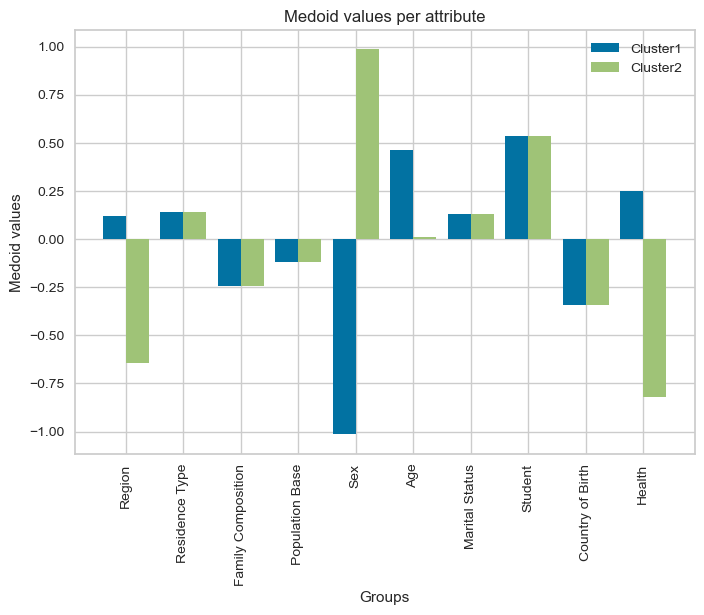

In [192]:
X = cluster1.keys()[:10]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_medoid_p1, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_medoid_p1, 0.4, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Medoid values")
plt.title("Medoid values per attribute")
plt.legend()
plt.show()

In [193]:
cluster1_medoid_p2 = cluster1_medoid[10:-1]
cluster1_medoid_p2

array([-0.35645891, -0.24260148, -0.59250546,  0.12503679,  0.5401699 ,
        1.15871977,  1.33019428,  0.00383859])

In [194]:
cluster2_medoid_p2 = cluster2_medoid[10:-1]
cluster2_medoid_p2

array([-0.35645891, -0.24260148,  0.21660362, -0.51655751, -0.70394075,
       -0.87241323, -0.83446416, -0.69892526])

### Visualisation of medoid values per attribute of the two clusters for the last 8 columns

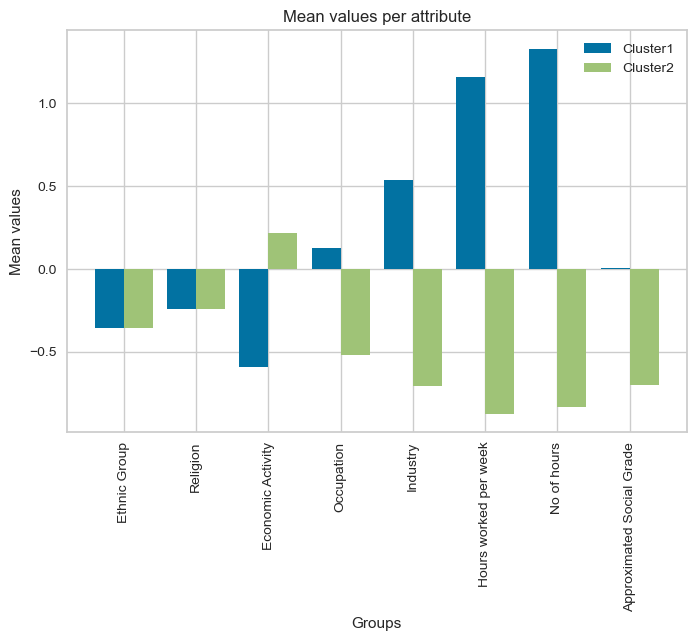

In [195]:
X = cluster1.keys()[10:-1]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_medoid_p2, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_medoid_p2, 0.4, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()